##### **Internship 2025 - Ouiam EL HAJJI**

## $$ \textit{Predictive and Exploratory Models in CNS tumors using ctDNA}  $$
<div align="center">

<h5>Department of Computational Biology and Medical Sciences  $$ \textit{University of Tokyo} $$ </h5>

</div>
________________________________________________________________________________________________________________________________________________

$$ \textit{Objective 1 : Predict Overall Survival} $$
**Goal** : Predict overall survival (OS_MONTHS, OS_STATUS) using genetic and clinical features.



### $$ \text{I.    Datasets managment (merging, cleaning,...)} $$

In [425]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### **Patient dataset (survival, duration, sex)**

In [426]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_clinical_patient.txt'

pd.set_option('display.max_columns', None)

df_cerebros_patient = pd.read_csv(file_name, sep = "\t", skiprows=4)
df_cerebros_patient

,PATIENT_ID,OS_MONTHS,OS_STATUS,SEX
0,P-0042717,4.241049,1:DECEASED,Male
1,P-0053191,38.399579,1:DECEASED,Female
2,P-0074598,6.509518,0:LIVING,Male
3,P-0037509,11.243712,1:DECEASED,Male
4,P-0046067,58.618536,0:LIVING,Male
...,...,...,...,...
706,P-0006299,103.593385,0:LIVING,Female
707,P-0052502,53.687083,0:LIVING,Male
708,P-0075798,29.884604,0:LIVING,Male
709,P-0043477,10.980702,1:DECEASED,Female


### **Patient sample dataset (TMB_NONSYNONYMOUS, CANCER_TYPE,...)**

In [427]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_clinical_sample.txt'

pd.set_option('display.max_columns', None)

df_cerebros_sample = pd.read_csv(file_name, sep = "\t", skiprows = 4)
df_cerebros_sample


,SAMPLE_ID,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS
0,P-0042717-T03-IM6,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA
1,P-0053191-T09-IM7,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA
2,P-0074598-T01-IM7,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA
3,P-0037509-T02-IM6,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA
4,P-0046067-T05-IM6,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA
...,...,...,...,...,...,...,...,...,...
1002,P-0001281-T03-IM6,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA
1003,P-0049043-T01-IM6,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA
1004,P-0071305-T02-IM7,P-0071305,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA
1005,P-0082845-T01-IM7,P-0082845,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA


In [461]:
df_final = df_final.rename(columns={'PATIENT_ID_x': 'PATIENT_ID'})
df_final

,Tumor_Sample_Barcode,PATIENT_ID,ONCOTREE_CODE_x,CTDNA_STATUS_x,SOMATIC_STATUS_x,TMB_NONSYNONYMOUS_x,CANCER_TYPE_x,CANCER_TYPE_DETAILED_x,SAMPLE_CLASS_x,OS_MONTHS_x,OS_STATUS_x,SEX_x,PATIENT_ID_y,ONCOTREE_CODE_y,CTDNA_STATUS_y,SOMATIC_STATUS_y,TMB_NONSYNONYMOUS_y,CANCER_TYPE_y,CANCER_TYPE_DETAILED_y,SAMPLE_CLASS_y,OS_MONTHS_y,OS_STATUS_y,SEX_y
0,P-0042717-T03-IM6,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA,4.241049,1:DECEASED,Male,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA,4.241049,1:DECEASED,Male
1,P-0053191-T09-IM7,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA,38.399579,1:DECEASED,Female,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA,38.399579,1:DECEASED,Female
2,P-0074598-T01-IM7,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA,6.509518,0:LIVING,Male,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA,6.509518,0:LIVING,Male
3,P-0037509-T02-IM6,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA,11.243712,1:DECEASED,Male,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA,11.243712,1:DECEASED,Male
4,P-0046067-T05-IM6,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA,58.618536,0:LIVING,Male,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA,58.618536,0:LIVING,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,P-0043477-T02-IM6,P-0043477,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,10.980702,1:DECEASED,Female,P-0043477,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,10.980702,1:DECEASED,Female
935,P-0064311-T04-IM7,P-0064311,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,40.865306,0:LIVING,Male,P-0064311,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,40.865306,0:LIVING,Male
936,P-0001281-T03-IM6,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA,81.270342,1:DECEASED,Male,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA,81.270342,1:DECEASED,Male
937,P-0049043-T01-IM6,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA,48.788506,0:LIVING,Male,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA,48.788506,0:LIVING,Male


In [460]:

df_cerebros_sample['PATIENT_ID'] = df_cerebros_sample['PATIENT_ID'].astype(str).str.strip()
df_final['PATIENT_ID'] = df_final['PATIENT_ID'].astype(str).str.strip()

df_survival = df_final[['PATIENT_ID', 'OS_MONTHS', 'OS_STATUS']]
df_survival_unique = df_survival.groupby('PATIENT_ID', as_index=False).first()

df_cox = df_cerebros_sample.merge(df_survival_unique, on='PATIENT_ID', how='left')

df_cox = df_cox.dropna(subset=['OS_MONTHS', 'OS_STATUS'])

# Compter les occurrences de chaque type de cancer
counts = df_cox['CANCER_TYPE'].value_counts()

# Garder uniquement ceux avec 20 occurrences ou plus
valid_types = counts[counts >= 20].index

# Filtrer le DataFrame avec ces types
df_cox = df_cox[df_cox['CANCER_TYPE'].isin(valid_types)]
df_cox




KeyError: "['OS_MONTHS', 'OS_STATUS'] not in index"

### **Get unique values**

In [430]:
unique_values = df_cerebros_sample['PATIENT_ID'].unique()
print(len(unique_values))

711


In [431]:
df_final[df_final['Tumor_Sample_Barcode'].str[:9] == 'P-0086233']


NameError: name 'df_final' is not defined

### **Mutation dataset : Mutation*Patient matrix**

In [432]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_cna.txt'

pd.set_option('display.max_columns', None)

df_cerebros = pd.read_csv(file_name, sep = "\t", index_col = 'Hugo_Symbol')



df_cerebros

,P-0071527-T01-IM7,P-0054168-T01-IM6,P-0064311-T02-IM7,P-0080115-T03-IM7,P-0066284-T01-IM7,P-0035665-T07-IM6,P-0057571-T03-IM7,P-0049043-T05-IM7,P-0064769-T05-IM7,P-0005114-T09-IM7,P-0082740-T02-IM7,P-0038911-T03-IM7,P-0064701-T02-IM7,P-0083253-T01-IM7,P-0065133-T01-IM7,P-0057140-T01-IM6,P-0033781-T02-IM7,P-0030797-T05-IM7,P-0053191-T03-IM7,P-0057194-T02-IM7,P-0047497-T04-IM7,P-0031477-T02-IM6,P-0005114-T10-IM7,P-0063487-T02-IM7,P-0059163-T03-IM7,P-0066628-T01-IM7,P-0070643-T01-IM7,P-0039410-T02-IM6,P-0018869-T03-IM6,P-0077397-T03-IM7,P-0030797-T04-IM7,P-0074634-T03-IM7,P-0017166-T03-IM7,P-0039162-T03-IM7,P-0071817-T03-IM7,P-0059163-T04-IM7,P-0072349-T01-IM7,P-0034907-T02-IM7,P-0062362-T01-IM7,P-0061628-T02-IM7,P-0010089-T02-IM7,P-0060604-T02-IM7,P-0018237-T02-IM7,P-0057571-T02-IM7,P-0011363-T03-IM7,P-0050340-T02-IM6,P-0068442-T03-IM7,P-0081493-T01-IM7,P-0070225-T07-IM7,P-0022993-T04-IM6,P-0055502-T14-IM7,P-0057016-T04-IM7,P-0023860-T13-IM7,P-0059163-T02-IM7,P-0041327-T05-IM6,P-0015964-T05-IM7,P-0061628-T04-IM7,P-0059466-T03-IM7,P-0050570-T03-IM7,P-0030589-T03-IM7,P-0072162-T01-IM7,P-0061635-T04-IM7,P-0047618-T01-IM6,P-0061628-T03-IM7,P-0086273-T02-IM7,P-0049539-T02-IM6,P-0056056-T04-IM7,P-0027683-T02-IM6,P-0035665-T10-IM7,P-0057571-T01-IM6,P-0060121-T05-IM7,P-0055106-T03-IM7,P-0043051-T05-IM7,P-0064311-T01-IM7,P-0039410-T03-IM7,P-0074138-T03-IM7,P-0019595-T02-IM6,P-0067969-T03-IM7,P-0017319-T08-IM6,P-0051534-T02-IM7,P-0042807-T03-IM6,P-0027013-T02-IM7,P-0003833-T03-IM6,P-0065133-T04-IM7,P-0048233-T01-IM6,P-0065588-T02-IM7,P-0025189-T02-IM6,P-0076919-T01-IM7,P-0025858-T02-IM7,P-0059163-T06-IM7,P-0039751-T02-IM7,P-0074138-T01-IM7,P-0080115-T06-IM7,P-0036307-T04-IM6,P-0039237-T02-IM7,P-0041409-T05-IM7,P-0044010-T03-IM7,P-0032790-T05-IM6,P-0039410-T04-IM7,P-0033449-T04-IM7,P-0073120-T12-IM7,P-0009538-T02-IM6,P-0061468-T02-IM7,P-0012836-T04-IM7,P-0007705-T02-IM6,P-0064587-T01-IM7,P-0080052-T02-IM7,P-0027848-T04-IM7,P-0058861-T01-IM7,P-0043866-T04-IM6,P-0064769-T03-IM7,P-0049043-T07-IM7,P-0073120-T13-IM7,P-0086273-T01-IM7,P-0025858-T03-IM7,P-0032183-T05-IM6,P-0065588-T01-IM7,P-0054722-T07-IM7,P-0042717-T03-IM6,P-0084980-T01-IM7,P-0063757-T01-IM7,P-0032909-T03-IM6,P-0039631-T02-IM6,P-0063190-T04-IM7,P-0037338-T03-IM6,P-0039237-T03-IM7,P-0074393-T01-IM7,P-0041409-T04-IM6,P-0041976-T02-IM6,P-0012674-T02-IM6,P-0027848-T06-IM7,P-0080335-T02-IM7,P-0053993-T02-IM6,P-0028620-T03-IM7,P-0074139-T01-IM7,P-0033609-T03-IM7,P-0049043-T06-IM7,P-0011338-T02-IM7,P-0061628-T01-IM7,P-0062982-T03-IM7,P-0069477-T03-IM7,P-0059357-T02-IM7,P-0059475-T02-IM7,P-0055378-T02-IM6,P-0022838-T02-IM7,P-0052605-T02-IM7,P-0006280-T03-IM7,P-0004455-T02-IM7,P-0078566-T01-IM7,P-0041221-T02-IM6,P-0043598-T01-IM6,P-0027848-T05-IM7,P-0043593-T02-IM6,P-0008881-T02-IM7,P-0036307-T02-IM6,P-0054088-T03-IM6,P-0050637-T03-IM6,P-0059163-T05-IM7,P-0047802-T02-IM6,P-0055497-T01-IM6,P-0082840-T02-IM7,P-0039860-T05-IM6,P-0080052-T04-IM7,P-0053993-T01-IM6,P-0069008-T05-IM7,P-0051294-T03-IM6,P-0049146-T03-IM7,P-0080882-T01-IM7,P-0039266-T03-IM6,P-0078894-T01-IM7,P-0071611-T01-IM7,P-0074280-T02-IM7,P-0076799-T02-IM7,P-0028620-T07-IM7,P-0064933-T03-IM7,P-0011420-T03-IM7,P-0034682-T04-IM7,P-0057200-T04-IM7,P-0080052-T06-IM7,P-0061518-T03-IM7,P-0043625-T02-IM6,P-0035713-T02-IM7,P-0013777-T03-IM6,P-0078897-T05-IM7,P-0038248-T02-IM6,P-0035324-T03-IM6,P-0067602-T02-IM7,P-0028620-T06-IM7,P-0078835-T01-IM7,P-0020236-T05-IM6,P-0064482-T04-IM7,P-0061518-T04-IM7,P-0077777-T02-IM7,P-0046726-T05-IM7,P-0055117-T02-IM7,P-0070128-T08-IM7,P-0073120-T10-IM7,P-0083747-T01-IM7,P-0059307-T01-IM7,P-0017319-T04-IM6,P-0021797-T05-IM7,P-0055579-T02-IM7,P-0052714-T01-IM6,P-0062486-T02-IM7,P-0032721-T04-IM7,P-0078571-T01-IM7,P-0006883-T02-IM6,P-0061712-T01-IM7,P-0040034-T03-IM6,P-0064517-T05-IM7,P-0035020-T02-IM7,P-0054856-T01-IM6,P-0043322-T03-IM6,P-0049783-T01-IM6,P-0071933-T02-IM7,P-0051040-T03-IM7,P-0080627-T01-IM7,P-0048222-T01-IM6,P-0044252-T01-IM6,P-0040935-T01-IM6,P-0053191-T07-IM7,P-0031795-T02-IM7,P-0

### **Transposing so i have the matrix in [ patient * mutation ] mode**

In [433]:
df_tr = df_cerebros.transpose()
df_tr
df_tr.reset_index
df_tr

Hugo_Symbol,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,DUSP22,H3-3A,H3-3B,SMG1,CDC73,PIK3CA,PIK3CB,PIK3CD,MIB1,PIK3CG,CRBN,CBLB,IGF1R,FBXO11,NUP98,NUP93,SERP2,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,PDS5B,MLL3,MLL2,SETBP1,MLL4,TYK2,XPO1,CSDE1,ETAA1,BACH2,ARID2,MST1,SOX17,FAF1,JAK2,H3F3B,NF1,JAK1,KSR2,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,PIGA,HIST2H3D,HIST2H3C,ZEB2,RPS6KA4,ZNRF3,ANKRD26,TOP1,HIST1H2BG,PRDM1,MYBBP1A,ATXN7,ATXN2,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,ATP6AP1,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,HIST1H2BO,CIITA,SMC3,RBM10,H3-4,H1-3,ETV1,JARID2,RXRA,LTB,SH2B3,ZNF292,ERCC2,YAP1,FOXO3,ALK,ARID5A,H3C11,LMO1,ALB,FOXO1,METTL23,PBRM1,RUNX1T1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,KLF2,ETNK1,CXCR4,RYBP,ATP6V1B2,MDC1,REST,P2RY8,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,YLPM1,SETD4,SETD5,CBFB,FOXF1,CDH1,SETD6,CDKN2B,CDKN2C,CDKN2A,BARD1,FANCL,CENPA,H2AC17,ARID1B,ARID1A,PLCG1,DDX41,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,NCSTN,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,MGAM,CCNE1,ITPKB,IKZF3,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,IRF8,MEF2B,NSD1,NSD3,BTK,HDAC1,PDGFRB,PDGFRA,CD70,HDAC4,HDAC7,ZFHX4,ATM,ZFHX3,ATR,ELOC,FANCD2,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,MECOM,DNAJB1,CSF1R,RPS6KB2,FANCG,FANCF,FANCE,FANCC,FANCA,FANCM,DOT1L,FANCI,FBXW7,ARID5B,TGFBR2,TGFBR1,SP140,TET1,TET3,TET2,GNB1,FOXL2,IRF1,EP300,KNSTRN,SRP72,MYO18A,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,SMARCA1,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,SBDS,CARD11,PRKCB,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,CHD2,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,ACTG1,KMT5A,PPP4R2,HIST1H1D,AXL,FURIN,GPS2,DNMT1,MAP3K6,MAP3K7,PARK2,FGFR2,INHBA,H1-4,H1-2,H3-5,H3F3C,SETDB1,SETDB2,JAK3,BRCA1,FLCN,BRCA2,H1-B,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,SETD7,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,HIF1A,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,U2AF2,SRSF2,EGR2,EGR1,JUN,PPP6C,NFE2,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,H2AC6,CUX1,PARP1,PAX5,PTPN2,PTPN1,SRCAP,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SETD1B,SHQ1,PHF6,VEGFA,LCK,NADK,MAD2L2,MKI67,SH2D1A,H3C12,INPP4B,MOB3B,TBX3,UPF1,NTRK2,BCORL1,CD79B,BCR,CD79A,STAT6,PGBD5,STAT3,CD58,ALOX12B,TCEB1,KDR,RPS26,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,EXOSC6,ATRX,RAD51D,RAD51C,LYN,TBL1XR1,SGK1,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,DTX1,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,FAS,TERC,MLLT1,MAPKAP1,TERT,NT5C2,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,ARID3A,KLHL6,ARID3C,ARID3B,SAMHD1,AXIN1,INSR,ARHGEF28,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,SETD1A,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,UBR5,MYC,HIST1H2AL,MPEG1,CD28,DDX3X,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,SOCS3,SOCS2,ROBO1,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,SETD3,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,TRAF3,EP400,EED,ARID4B,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,PCBP1,MYD88,GRIN2A,SMC1A,NXF1,STAG2,STAG1,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RHOH,RECQL,RAD21,HIST1H2BC,RHOA,FGF4,FGF3,HIST1H2BJ,HIST1H2BK,INHA,PRDM14,ETV5,ETV4,ZMYM3,ETV6,VAV1,MPL,VAV2,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,H2AC16,ABL1,IKZF1,NCOR2,NCOR1,TP63,DROSHA,BTG1,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,PHIP,DUSP4,H2B17,PDCD1,HIST1H2AG,PTPRT,H2BC4,H2BC5,BCOR,H2BC8,HIST1H1E,HIST1H1B,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,RPS15,ZNF318,RPS19,JUNB,BCL11B,HIST1H2AM,LATS2,LATS1,ARID4A,ELF3,HIST1H2AC,XBP1,ZRSR2,

In [434]:
unique_values = df_tr['SMG1'].unique()
print(unique_values , len(df_cerebros.columns.unique()))

[nan] 603


In [435]:
df_final.columns

NameError: name 'df_final' is not defined

In [436]:
L= df_final.columns
def get_MOST_NaN_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_tr[elt].isnull().sum()
        
        if count == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L))

NameError: name 'df_final' is not defined

In [437]:
mutation_matrix = df_tr.drop(['DUSP22', 'SMG1', 'MIB1', 'CRBN', 'CBLB', 'FBXO11', 'NUP98', 'SERP2', 'PDS5B', 'SETBP1', 'TYK2', 'BACH2', 'FAF1', 'KSR2', 'PIGA', 'ZEB2', 'ANKRD26', 'HIST1H2BG', 'MYBBP1A', 'ATXN2', 'ATP6AP1', 'HIST1H2BO', 'CIITA', 'SMC3', 'H1-3', 'JARID2', 'LTB', 'ZNF292', 'FOXO3', 'ARID5A', 'METTL23', 'RUNX1T1', 'KLF2', 'ETNK1', 'ATP6V1B2', 'P2RY8', 'YLPM1', 'SETD4', 'SETD5', 'SETD6', 'FANCL', 'H2AC17', 'PLCG1', 'DDX41', 'NCSTN', 'MGAM', 'ITPKB', 'IKZF3', 'IRF8', 'HDAC1', 'CD70', 'HDAC4', 'HDAC7', 'ZFHX4', 'FANCD2', 'MECOM', 'FANCG', 'FANCF', 'FANCE', 'FANCM', 'FANCI', 'SP140', 'TET3', 'IRF1', 'SRP72', 'MYO18A', 'SMARCA1', 'SBDS', 'PRKCB', 'CHD2', 'ACTG1', 'HIST1H1D', 'FURIN', 'MAP3K6', 'MAP3K7', 'H1-4', 'SETDB2', 'H1-B', 'SETD7', 'HIF1A', 'U2AF2', 'EGR2', 'EGR1', 'NFE2', 'H2AC6', 'CUX1', 'PTPN2', 'PTPN1', 'SRCAP', 'SETD1B', 'LCK', 'MKI67', 'MOB3B', 'BCORL1', 'BCR', 'STAT6', 'CD58', 'RPS26', 'EXOSC6', 'TBL1XR1', 'SGK1', 'DTX1', 'FAS', 'TERC', 'NT5C2', 'ARID3A', 'KLHL6', 'ARID3C', 'ARID3B', 'SAMHD1', 'ARHGEF28', 'SETD1A', 'UBR5', 'HIST1H2AL', 'MPEG1', 'CD28', 'DDX3X', 'SOCS3', 'SOCS2', 'ROBO1', 'SETD3', 'TRAF3', 'EP400', 'ARID4B', 'PCBP1', 'SMC1A', 'NXF1', 'STAG1', 'RHOH', 'HIST1H2BC', 'HIST1H2BJ', 'HIST1H2BK', 'ETV5', 'ETV4', 'ZMYM3', 'VAV1', 'VAV2', 'H2AC16', 'NCOR2', 'BTG1', 'PHIP', 'H2B17', 'HIST1H2AG', 'H2BC4', 'H2BC8', 'HIST1H1E', 'HIST1H1B', 'RPS15', 'ZNF318', 'RPS19', 'JUNB', 'BCL11B', 'HIST1H2AM', 'ARID4A', 'HIST1H2AC', 'XBP1', 'TNFRSF1B', 'ESCO2', 'LRP1B', 'GNA13', 'TRAF5', 'GNA12'], axis=1)

mutation_matrix.index

Index(['P-0071527-T01-IM7', 'P-0054168-T01-IM6', 'P-0064311-T02-IM7',
       'P-0080115-T03-IM7', 'P-0066284-T01-IM7', 'P-0035665-T07-IM6',
       'P-0057571-T03-IM7', 'P-0049043-T05-IM7', 'P-0064769-T05-IM7',
       'P-0005114-T09-IM7',
       ...
       'P-0058474-T04-IM7', 'P-0052145-T05-IM7', 'P-0046319-T03-IM7',
       'P-0035665-T13-IM7', 'P-0082766-T01-IM7', 'P-0074634-T02-IM7',
       'P-0059526-T04-IM7', 'P-0077891-T03-IM7', 'P-0055378-T07-IM7',
       'P-0052694-T01-IM6'],
      dtype='object', length=603)

#### Creating copy of **mutation_matrix** with `Patient_ID` as an index instead of `Tumor_ID`

In [438]:
mutation_matrix_copy = mutation_matrix.copy()

#mutation_matrix_copy
def Keep_patient_ID(df):
    df.index = df.index.map(lambda x: x[:9])
    return df
Keep_patient_ID(mutation_matrix_copy)

Hugo_Symbol,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A
P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### **Data gene panel matrix**

In [439]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_gene_panel_matrix.txt'

pd.set_option('display.max_columns', None)

df_cerebros = pd.read_csv(file_name, sep = "\t")

df_cerebros




,SAMPLE_ID,mutations,gistic,structural_variants
0,P-0042717-T03-IM6,IMPACT468,IMPACT468,IMPACT468
1,P-0053191-T09-IM7,IMPACT505,IMPACT505,IMPACT505
2,P-0074598-T01-IM7,IMPACT505,IMPACT505,IMPACT505
3,P-0037509-T02-IM6,IMPACT468,IMPACT468,IMPACT468
4,P-0046067-T05-IM6,IMPACT468,IMPACT468,IMPACT468
...,...,...,...,...
598,P-0071933-T02-IM7,IMPACT505,IMPACT505,IMPACT505
599,P-0058734-T06-IM7,IMPACT505,IMPACT505,IMPACT505
600,P-0058734-T08-IM7,IMPACT505,IMPACT505,IMPACT505
601,P-0049043-T01-IM6,IMPACT468,IMPACT468,IMPACT468


### **Mutation + features dataset (without empty columns)**

In [455]:
df_cleaned = df_cerebros_mut.dropna(axis=1, how='all')
df_cleaned

NameError: name 'df_cerebros_mut' is not defined

### **Structural Variant dataset**

In [441]:
file_name = 'CerebrospinalFluidCirculatingTumor/data_sv.txt'

pd.set_option('display.max_columns', None)

df_sv = pd.read_csv(file_name, sep = "\t")



In [442]:
L = df_sv.columns
def get_MOST_NaN_columns(L, df):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df[elt].isnull().sum()
        
        if count == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L, df_sv))

df_sv.drop(['Site1_Ensembl_Transcript_Id', 'Site2_Ensembl_Transcript_Id', 'Site1_Entrez_Gene_Id', 'Site2_Entrez_Gene_Id', 'Site1_Region_Number', 'Site2_Region_Number', 'Site1_Region', 'Site2_Region', 'Site1_Contig', 'Site2_Contig', 'Site2_Effect_On_Frame', 'Normal_Paired_End_Read_Count', 'Normal_Split_End_Read_Count', 'LEVEL_R1', 'LEVEL_R2', 'HIGHEST_RESISTANCE_LEVEL', 'LEVEL_Dx1', 'LEVEL_Dx2', 'LEVEL_Dx3', 'HIGHEST_DX_LEVEL', 'DX_CITATIONS', 'LEVEL_Px1', 'LEVEL_Px2', 'LEVEL_Px3', 'HIGHEST_PX_LEVEL', 'PX_CITATIONS'], axis = 1)

(['Sample_Id', 'SV_Status', 'Site1_Hugo_Symbol', 'Site2_Hugo_Symbol', 'Site1_Chromosome', 'Site2_Chromosome', 'Site1_Position', 'Site2_Position', 'Site1_Description', 'Site2_Description', 'NCBI_Build', 'Class', 'Event_Info', 'Breakpoint_Type', 'Connection_Type', 'Annotation', 'SV_Length', 'Normal_Read_Count', 'Tumor_Read_Count', 'Comments', 'ANNOTATED', 'GENE_IN_ONCOKB', 'VARIANT_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC'], 25)


,Sample_Id,SV_Status,Site1_Hugo_Symbol,Site2_Hugo_Symbol,Site1_Chromosome,Site2_Chromosome,Site1_Position,Site2_Position,Site1_Description,Site2_Description,NCBI_Build,Class,Tumor_Split_Read_Count,Tumor_Paired_End_Read_Count,Event_Info,Breakpoint_Type,Connection_Type,Annotation,DNA_Support,RNA_Support,SV_Length,Normal_Read_Count,Tumor_Read_Count,Normal_Variant_Count,Tumor_Variant_Count,Comments,ANNOTATED,GENE_IN_ONCOKB,VARIANT_IN_ONCOKB,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,HIGHEST_LEVEL,HIGHEST_SENSITIVE_LEVEL,TX_CITATIONS
0,P-0036583-T01-IM6,SOMATIC,SDHAF2,MGMT,11,10,61201093,131288948,Intron of SDHAF2(+):3Kb after exon 1,Intron of MGMT(+):23Kb after exon 1,GRCh37,TRANSLOCATION,10.0,19.0,Protein Fusion: in frame {SDHAF2:MGMT},PRECISE,3to5,SDHAF2 (NM_017841) - MGMT (NM_002412) rearrang...,yes,unknown,0,0,0,0.0,18.0,Note: The SDHAF2 - MGMT rearrangement is a tra...,True,True,False,Likely Loss-of-function,20226277;31039394;28099933;29625055;31687641;2...,Likely Oncogenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P-0022337-T04-IM6,SOMATIC,FGFR2,TBC1D4,13,10,75946350,123241723,Intron of TBC1D4(-):10Kb before exon 2,Intron of FGFR2(-):1Kb after exon 17,GRCh37,TRANSLOCATION,0.0,9.0,Protein Fusion: in frame {FGFR2:TBC1D4},IMPPRECISE,3to5,FGFR2 (NM_000141) - TBC1D4 (NM_014832) fusion:...,yes,unknown,0,0,0,0.0,9.0,Note: The FGFR2 - TBC1D4 fusion involves FGFR2...,True,True,False,Likely Gain-of-function,25608663;28430863;26254407;34551969;23558953;2...,Likely Oncogenic,NaN,NaN,NaN,"Erdafitinib,Pemigatinib,Infigratinib,Futibatinib","Debio1347,AZD4547",LEVEL_3B,LEVEL_3B,26324363;31340094;32203698;Javle et al. Abstra...
2,P-0026050-T04-IM6,SOMATIC,ATR,ATR,3,3,142237194,142238601,Intron of ATR(-):1Kb after exon 24,Exon 24 of ATR(-),GRCh37,DELETION,5.0,7.0,Deletion within transcript : mid-exon,PRECISE,3to5,ATR (NM_001184) rearrangement: c.4292_c.4382+1...,yes,unknown,1407,492,529,0.0,7.0,Note: The ATR rearrangement is an intragenic d...,True,True,False,Likely Loss-of-function,15282542;10691732,Likely Oncogenic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P-0026050-T04-IM6,SOMATIC,BRAF,BRAF,7,7,140494164,145389205,Exon 8 of BRAF(-),IGR: 424Kb before CNTNAP2(+),GRCh37,DELETION,10.0,129.0,BRAF-intragenic,PRECISE,3to5,BRAF (NM_004333) rearrangement: c.1084:BRAF_ch...,yes,unknown,4895041,53686,131413,0.0,135.0,Note: The BRAF rearrangement is a deletion of ...,True,True,True,Likely Gain-of-function,26314551;26343582;22745804;15630448;28783719;2...,Likely Oncogenic,NaN,NaN,NaN,"Selumetinib,Trametinib,Cobimetinib",NaN,LEVEL_3B,LEVEL_3B,31151904;24345920;26314551;26072686
4,P-0026050-T04-IM6,SOMATIC,BTK,BTK,X,X,82536485,100617693,IGR: 227Kb before POU3F4(+),Intron of BTK(-):16bp before exon 6,GRCh37,INVERSION,0.0,13.0,BTK-intragenic,IMPPRECISE,3to3,BTK (NM_000061) rearrangement: c.392-16:BTK_ch...,yes,unknown,18081208,38829,40293,0.0,15.0,Note: The BTK rearrangement is an inversion of...,True,True,False,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,P-0000280-T07-IM7,SOMATIC,RAD51B,RAD51B,14,14,68301800,68418966,Exon 4 of RAD51B(+),Intron of RAD51B(+):65Kb after exon 7,GRCh37,INVERSION,NaN,NaN,RAD51B-intragenic,PRECISE,5to5,RAD51B (NM_133509) rearrangement: c.202_c.756+...,NaN,NaN,117166,3948,948,0.0,19.0,Note: The RAD51B rearrangement is an intrageni...,True,True,False,Likely Loss-of-function,26261251;25600502;24139550;25368520;16778173,Likely Oncogenic,NaN,NaN,NaN,Olaparib,NaN,LEVEL_3B,LEVEL_3B,32343890
180,P-0061303-T05-IM7,SOMATIC,ARRDC4,IGF1R,15,15,98512307,99192892,Intron of ARRDC4(+):45bp before exon 5,Exon 1 of IGF1R(+),GRCh37,DELETION,NaN,NaN,Protein Fusion: mid-exon {ARRDC4:IGF1R},PRECISE,3to5,ARRDC4 (NM_183376) - IGF1R (NM_000875) rearran...,NaN,NaN,680585,2968,1215,0.0,6.0,Note: The ARRDC4 - IGF1R rearrangement is a de...,True,True

#### $${I. a. Merging} $$

#### **Merging `Patient info` (PATIENT_ID, OS_MONTHS, OS_STATUS, SEX) and `Sample info` (TMB, Cancer_type,...)**

In [443]:
# S'assurer que PATIENT_ID est bien une chaîne de caractères dans les deux DataFrames
df_cerebros_sample["PATIENT_ID"] = df_cerebros_sample["PATIENT_ID"].astype(str)
df_cerebros_patient["PATIENT_ID"] = df_cerebros_patient["PATIENT_ID"].astype(str)

# Sélectionner uniquement les colonnes utiles du patient
patient_info = df_cerebros_patient[["PATIENT_ID", "OS_MONTHS", "OS_STATUS", "SEX"]]

# Fusionner avec df_cerebros_sample
df_merged = df_cerebros_sample.merge(patient_info, on="PATIENT_ID", how="left")
df_merged = df_merged.rename(columns={'SAMPLE_ID': 'Tumor_Sample_Barcode'})

df_merged = df_merged.dropna()

In [444]:
print("Nombre de lignes initial :", len(df_merged))
print("Nombre de lignes sans NaN :", len(df_merged.dropna()))
print("Lignes supprimées :", len(df_merged) - len(df_merged.dropna()))

Nombre de lignes initial : 939
Nombre de lignes sans NaN : 939
Lignes supprimées : 0


In [452]:
df_cleaned = df_merged.dropna()

#### **Matching mutations to `Patient` & `Sample` info**

In [453]:
df_cLeaned= df_cleaned.copy()

df_merged = df_merged.copy()

df_cleaned

,Tumor_Sample_Barcode,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,OS_MONTHS,OS_STATUS,SEX
0,P-0042717-T03-IM6,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA,4.241049,1:DECEASED,Male
1,P-0053191-T09-IM7,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA,38.399579,1:DECEASED,Female
2,P-0074598-T01-IM7,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA,6.509518,0:LIVING,Male
3,P-0037509-T02-IM6,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA,11.243712,1:DECEASED,Male
4,P-0046067-T05-IM6,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA,58.618536,0:LIVING,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,P-0043477-T02-IM6,P-0043477,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,10.980702,1:DECEASED,Female
1001,P-0064311-T04-IM7,P-0064311,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,40.865306,0:LIVING,Male
1002,P-0001281-T03-IM6,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA,81.270342,1:DECEASED,Male
1003,P-0049043-T01-IM6,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA,48.788506,0:LIVING,Male


In [454]:
df_cLeaned= df_cleaned.copy()
df_cleaned
df_merged = df_merged.copy()

df_merged['Tumor_Sample_Barcode'] = df_merged['Tumor_Sample_Barcode'].astype(str).str.strip()
df_cleaned['Tumor_Sample_Barcode'] = df_cleaned['Tumor_Sample_Barcode'].astype(str).str.strip()

df_final = df_cleaned.merge(df_merged, on='Tumor_Sample_Barcode', how='left')

df_final

,Tumor_Sample_Barcode,PATIENT_ID_x,ONCOTREE_CODE_x,CTDNA_STATUS_x,SOMATIC_STATUS_x,TMB_NONSYNONYMOUS_x,CANCER_TYPE_x,CANCER_TYPE_DETAILED_x,SAMPLE_CLASS_x,OS_MONTHS_x,OS_STATUS_x,SEX_x,PATIENT_ID_y,ONCOTREE_CODE_y,CTDNA_STATUS_y,SOMATIC_STATUS_y,TMB_NONSYNONYMOUS_y,CANCER_TYPE_y,CANCER_TYPE_DETAILED_y,SAMPLE_CLASS_y,OS_MONTHS_y,OS_STATUS_y,SEX_y
0,P-0042717-T03-IM6,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA,4.241049,1:DECEASED,Male,P-0042717,LUNG,Positive,Matched,0.100000,Lung Cancer,Lung,ctDNA,4.241049,1:DECEASED,Male
1,P-0053191-T09-IM7,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA,38.399579,1:DECEASED,Female,P-0053191,MNET,Positive,Matched,0.100000,Miscellaneous Neuroepithelial Tumor,Miscellaneous Neuroepithelial Tumor,ctDNA,38.399579,1:DECEASED,Female
2,P-0074598-T01-IM7,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA,6.509518,0:LIVING,Male,P-0074598,GNOS,Positive,Matched,0.000000,Miscellaneous Brain Tumor,"Glioma, NOS",ctDNA,6.509518,0:LIVING,Male
3,P-0037509-T02-IM6,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA,11.243712,1:DECEASED,Male,P-0037509,GNOS,Positive,Matched,0.200000,Cancer of Unknown Primary,"Glioma, NOS",ctDNA,11.243712,1:DECEASED,Male
4,P-0046067-T05-IM6,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA,58.618536,0:LIVING,Male,P-0046067,PRNET,Positive,Matched,0.000000,Miscellaneous Brain Tumor,Primary Neuroepithelial Tumor,ctDNA,58.618536,0:LIVING,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,P-0043477-T02-IM6,P-0043477,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,10.980702,1:DECEASED,Female,P-0043477,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,10.980702,1:DECEASED,Female
935,P-0064311-T04-IM7,P-0064311,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,40.865306,0:LIVING,Male,P-0064311,EMBT,Negative,Matched,0.000000,Embryonal Tumor,Embryonal Tumor,ctDNA,40.865306,0:LIVING,Male
936,P-0001281-T03-IM6,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA,81.270342,1:DECEASED,Male,P-0001281,GNOS,Negative,Matched,0.000000,Glioma,"Glioma, NOS",ctDNA,81.270342,1:DECEASED,Male
937,P-0049043-T01-IM6,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA,48.788506,0:LIVING,Male,P-0049043,EMBT,Positive,Matched,0.033333,Embryonal Tumor,Embryonal Tumor,ctDNA,48.788506,0:LIVING,Male


In [448]:
unique = df_final['PATIENT_ID'].unique()
print(len(unique))


NameError: name 'df_final' is not defined

#### $${I. b. Pre-processing : analysis of columns} $$

In [380]:
L = df_final.columns
def get_useless_column(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df_final[elt].unique()
        l = len(unique)
        if l == 1 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_useless_column(L))


(['Center', 'NCBI_Build', 'Strand', 'Validation_Status', 'Mutation_Status', 'Score', 'GENE_IN_ONCOKB', 'Annotation_Status'], 8)


In [194]:
def get_MOST_NaN_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_final[elt].isnull().sum()
        
        if count <= 788 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_MOST_NaN_columns(L))

(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Exon_Number', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'OS_MONTHS', 'OS_STATUS', 'SEX'], 47)


In [184]:
def get_complete_columns(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        count = df_final[elt].isnull().sum()
        
        if count == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_complete_columns(L))

(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'Transcript_ID', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'OS_STATUS', 'SEX'], 39)


### $$ \text{II. Random Forest} $$
#### $$ \textit{ Random Forest on Mutation+Features dataset} $$

In [396]:
def get_20_percent_patient(df):
    counting_patient = 0
    for i in range(len(df['PATIENT_ID'])):
        if df.iloc[i-1]['PATIENT_ID']!=df.iloc[i]['PATIENT_ID']:
            
            counting_patient += 1
            if counting_patient == 120:
                return i

get_20_percent_patient(df_final)   


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,GENE_IN_ONCOKB,HIGHEST_LEVEL,LEVEL_1,LEVEL_2,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,MUTATION_EFFECT,MUTATION_EFFECT_CITATIONS,ONCOGENIC,TX_CITATIONS,VARIANT_IN_ONCOKB,VF,Annotation_Status,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,OS_MONTHS,OS_STATUS,SEX
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs121913343,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305.4:c.817C>T,p.Arg273Cys,p.R273C,ENST00000269305,NM_001126112.2,273.0,Cgt/Tgt,8/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,23863845;11900253;23612969;15037740,Likely Oncogenic,NaN,True,0.750000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,rs121913500,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146.2:c.395G>A,p.Arg132His,p.R132H,ENST00000345146,NM_005896.2,132.0,cGt/cAt,4/10,True,LEVEL_3A,NaN,NaN,Ivosidenib,NaN,NaN,NaN,NaN,Switch-of-function,23393090;22763442;29670690;19935646;29860938,Oncogenic,29670690;32530764,True,0.540816,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,rs876661024,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953.3:c.635-1G>C,NaN,p.X212_splice,ENST00000371953,NM_000314.4,212.0,NaN,NaN,True,LEVEL_4,NaN,NaN,NaN,NaN,"GSK2636771,AZD8186",NaN,NaN,Likely Loss-of-function,17218262;11237521,Likely Oncogenic,"28645941;Hansen et al. Abstract# 2570, ASCO 20...",False,0.474138,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344.5:c.965C>G,p.Ser322Ter,p.S322*,ENST00000373344,NM_000489.3,322.0,tCa/tGa,9/35,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,21719641;8968741;24148618;15591283;14592816;18...,Likely Oncogenic,NaN,False,0.920000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096.4:c.1877C>T,p.Thr626Met,p.T626M,ENST00000369096,NM_001198.3,626.0,aCg/aTg,6/7,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,False,0.373832,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,4.241049,1:DECEASED,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,rs121912655,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305.4:c.725G>T,p.Cys242Phe,p.C242F,ENST00000269305,NM_001126112.2,242.0,tGc/tTc,7/11,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely Loss-of-function,17401432,Likely Oncogenic,NaN,True,0.640212,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,26.892856,1:DECEASED,Male
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,NaN,P-002622

In [504]:
unique = df_final['CTDNA_STATUS'].unique()
unique

array(['Positive'], dtype=object)

In [248]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = df_final.drop('OS_STATUS', axis=1)
y = df_final['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train = X_encoded.iloc[:607]
X_test = X_encoded.iloc[607:]

y_train = y.iloc[:607]
y_test = y.iloc[607:]

# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.8616

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.41      0.14      0.21       434
  1:DECEASED       0.88      0.97      0.92      2903

    accuracy                           0.86      3337
   macro avg       0.65      0.56      0.57      3337
weighted avg       0.82      0.86      0.83      3337


=== Matrice de confusion ===
[[  62  372]
 [  90 2813]]


#### $$ \textit{ Random Forest on only Features dataset} $$

In [ ]:
df_merged

In [379]:
X = df_merged.drop('OS_STATUS', axis=1)
y = df_merged['OS_STATUS']

# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.8245

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.76      0.73      0.74        66
  1:DECEASED       0.86      0.88      0.87       122

    accuracy                           0.82       188
   macro avg       0.81      0.80      0.81       188
weighted avg       0.82      0.82      0.82       188


=== Matrice de confusion ===
[[ 48  18]
 [ 15 107]]


#### $$ \textit{ Random Forest on Mutation profile dataset only} $$

In [370]:
#mutation_matrix_copy = mutation_matrix_copy.reset_index()
mutation_matrix_patient_ID = Keep_patient_ID(mutation_matrix_copy)
mutation_matrix_patient_ID.columns
mutation_matrix_patient_ID = mutation_matrix_patient_ID.reset_index()
mutation_matrix_patient_ID


Hugo_Symbol,index,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A
0,P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [371]:

mutation_matrix_patient_ID = mutation_matrix_patient_ID.rename(columns={'index': 'PATIENT_ID'})
mutation_matrix_patient_ID.columns

Index(['PATIENT_ID', 'TAP1', 'ERRFI1', 'STK19', 'CRKL', 'SCG5', 'STK11',
       'MEN1', 'B2M', 'TAP2',
       ...
       'PTPRS', 'PTPRD', 'BRAF', 'FAM175A', 'SDHA', 'PDPK1', 'BAP1', 'SDHB',
       'SDHD', 'PRKAR1A'],
      dtype='object', name='Hugo_Symbol', length=540)

In [372]:
mutation_matrix_patient_ID = mutation_matrix_patient_ID.rename(columns={'index': 'PATIENT_ID'})

df_cerebros_patient['PATIENT_ID'] = df_cerebros_patient['PATIENT_ID'].astype(str).str.strip()
mutation_matrix_patient_ID['PATIENT_ID'] = mutation_matrix_patient_ID['PATIENT_ID'].astype(str).str.strip()

mutation_matrix_with_class = mutation_matrix_patient_ID.merge(df_cerebros_patient, on='PATIENT_ID', how='left')

mutation_matrix_with_class

,PATIENT_ID,TAP1,ERRFI1,STK19,CRKL,SCG5,STK11,MEN1,B2M,TAP2,PMAIP1,H3-3A,H3-3B,CDC73,PIK3CA,PIK3CB,PIK3CD,PIK3CG,IGF1R,NUP93,PIK3C2G,SMARCD1,PIK3C3,GATA2,GATA3,GATA1,CCND1,MAX,CCND3,CCND2,PTEN,NTHL1,CTCF,IL7R,CDKN1B,CDKN1A,RIT1,MLL3,MLL2,MLL4,XPO1,CSDE1,ETAA1,ARID2,MST1,SOX17,JAK2,H3F3B,NF1,JAK1,GTF2I,FAM123B,TMEM127,ASXL2,SPRTN,BLM,PPARG,HIST2H3D,HIST2H3C,RPS6KA4,ZNRF3,TOP1,PRDM1,ATXN7,EIF4A2,MAP3K1,SESN1,SESN2,SESN3,SMAD4,RET,SMAD3,SMO,XIAP,REL,FH,FAM46C,TSC2,TSC1,NCOA3,RBM10,H3-4,ETV1,RXRA,SH2B3,ERCC2,YAP1,ALK,H3C11,LMO1,ALB,FOXO1,PBRM1,CUL3,PRKD1,CDC42,ERBB2,ERBB3,EGFR,HNF1A,CTNNB1,PLCG2,ERF,ERG,MITF,RPTOR,MYOD1,CDK12,KLF5,KLF4,PGR,CXCR4,RYBP,MDC1,REST,SUFU,HGF,INPP4A,HOXB13,E2F3,CALR,MAP3K13,MAP3K14,CREBBP,CSF3R,SPRED1,FAM58A,VTCN1,ARAF,IKBKE,ROS1,RARA,NFE2L2,CBFB,FOXF1,CDH1,CDKN2B,CDKN2C,CDKN2A,BARD1,CENPA,ARID1B,ARID1A,CYLD,WHSC1,APC,PAK7,PAK1,RECQL4,FOXP1,SDHC,FUBP1,RRAS,SMARCE1,CYSLTR2,MYCN,MYCL,U2AF1,CCNE1,IGF2,IGF1,TCF3,MRE11,TEK,XRCC2,SMYD3,EIF4E,EPAS1,MGA,APLNR,IRF4,MEF2B,NSD1,NSD3,BTK,PDGFRB,PDGFRA,ATM,ZFHX3,ATR,ELOC,BRIP1,FLT4,FLT3,FLT1,MRE11A,SLX4,MAPK3,DNAJB1,CSF1R,RPS6KB2,FANCC,FANCA,DOT1L,FBXW7,ARID5B,TGFBR2,TGFBR1,TET1,TET2,GNB1,FOXL2,EP300,KNSTRN,IRS1,IRS2,KEAP1,SHOC2,CDK4,RAD52,CDK6,RAD50,CDK8,USP8,MSH2,MSH3,SF3B1,PRKN,MSH6,EZH1,EZH2,MCL1,SOX2,BBC3,SMARCA4,CEBPA,ICOSLG,AXIN2,INPPL1,RAD54L,FYN,RB1,MED12,COP1,AURKA,SUZ12,PRKCI,GREM1,RAC2,RAC1,CARD11,MLL,HIST1H3B,HIST1H3C,HIST1H3A,HIST1H3F,HIST1H3G,HIST1H3D,HIST1H3E,HIST1H3J,PDCD1LG2,HIST1H3H,HIST1H3I,NOTCH4,NOTCH1,NOTCH2,NOTCH3,FGFR4,ARHGAP35,MTOR,PTCH1,MET,CRLF2,KMT5A,PPP4R2,AXL,GPS2,DNMT1,PARK2,FGFR2,INHBA,H1-2,H3-5,H3F3C,SETDB1,JAK3,BRCA1,FLCN,BRCA2,H3F3A,ERBB4,IDH2,IDH1,SETD8,BRD4,MDM2,SETD2,MDM4,FGFR3,FGFR1,SYK,PTPN11,TCF7L2,KIT,FOXA1,RUNX1,HIST3H3,LZTR1,PNRC1,HRAS,RRAS2,GAB2,CARM1,GAB1,TNFRSF14,IFNGR1,RAD51B,TSHR,RICTOR,STK40,DAXX,SDHAF2,PPM1D,SRSF2,JUN,PPP6C,BABAM1,CHEK2,CHEK1,CTLA4,EPHB1,RAD51,PARP1,PAX5,TP53,GNAQ,ESR1,DDR2,CD274,PALB2,CYP19A1,SHQ1,PHF6,VEGFA,NADK,MAD2L2,SH2D1A,H3C12,INPP4B,TBX3,UPF1,NTRK2,CD79B,CD79A,PGBD5,STAT3,ALOX12B,TCEB1,KDR,SRC,ERCC3,ERCC4,EIF2C1,SLFN11,ERCC5,ATRX,RAD51D,RAD51C,LYN,VHL,IL10,GNAS,SOX9,RHEB,PPP2R1A,CD276,WT1,SPEN,BIRC3,H3C10,MAP2K2,MAP2K1,H3C13,H3C14,CBL,MAP2K4,SMARCA2,YES1,ANKRD11,MLLT1,MAPKAP1,TERT,MALT1,KMT2C,KMT2B,KMT2A,SMARCB1,KMT2D,SPOP,MSI2,MSI1,RAB35,TP53BP1,EPCAM,AXIN1,INSR,CASP8,H3C2,H3C3,H3C1,H3C6,H3C7,H3C4,H3C8,BCL6,TRIP13,BCL2,BCL2L1,PLK2,AKT1,AKT2,AKT3,NKX2-1,SERPINB3,EIF1AX,NTRK1,WHSC1L1,NTRK3,PTP4A1,MYC,AURKB,NUF2,NEGR1,SMAD2,PMS1,PMS2,SERPINB4,RAF1,KRAS,SOCS1,CCNQ,FTSJD1,MST1R,POLE,GSK3B,EGFL7,FAT1,KDM5A,KDM5C,HLA-C,HLA-B,HLA-A,NFKBIA,EZHIP,EED,KBTBD4,PREX2,ASXL1,AMER1,PIM1,CTR9,PIK3R3,PIK3R2,PIK3R1,MYD88,GRIN2A,STAG2,RNF43,ABRAXAS1,HIST1H2BD,DCUN1D1,RECQL,RAD21,RHOA,FGF4,FGF3,INHA,PRDM14,ETV6,MPL,TNFAIP3,BMPR1A,AGO2,RFWD2,EPHA7,EPHA5,EPHA3,POT1,MUTYH,ABL1,IKZF1,NCOR1,TP63,DROSHA,NPM1,RASA1,POLD1,FGF19,MAPK1,KDM6A,NBN,DUSP4,PDCD1,PTPRT,H2BC5,BCOR,HIST1H1C,DICER1,SOS1,WWTR1,ID3,STAT5B,STAT5A,NKX3-1,CIC,MYCL1,ACVR1,LATS2,LATS1,ELF3,ZRSR2,BCL2L11,NRAS,MLH1,GLI1,PHOX2B,DNMT3B,NF2,TRAF2,DNMT3A,RRAGC,TRAF7,TENT5C,TMPRSS2,GNA11,AR,RTEL1,MTAP,BCL10,DIS3,PTPRS,PTPRD,BRAF,FAM175A,SDHA,PDPK1,BAP1,SDHB,SDHD,PRKAR1A,OS_MONTHS,OS_STATUS,SEX
0,P-0071527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [376]:
X = mutation_matrix_with_class.drop(['OS_STATUS','OS_MONTHS','SEX'], axis=1)
y = mutation_matrix_with_class['OS_STATUS']




# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.6364

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.40      0.49      0.44        35
  1:DECEASED       0.77      0.70      0.73        86

    accuracy                           0.64       121
   macro avg       0.58      0.59      0.58       121
weighted avg       0.66      0.64      0.65       121


=== Matrice de confusion ===
[[17 18]
 [26 60]]


In [378]:
X = mutation_matrix_with_class.drop(['OS_STATUS', 'OS_MONTHS', 'SEX'], axis=1)
y = mutation_matrix_with_class['OS_STATUS']




# 3. Encoder
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.6364

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.40      0.49      0.44        35
  1:DECEASED       0.77      0.70      0.73        86

    accuracy                           0.64       121
   macro avg       0.58      0.59      0.58       121
weighted avg       0.66      0.64      0.65       121


=== Matrice de confusion ===
[[17 18]
 [26 60]]


#### $$ \text{Conclusion so far :} $$

| dataset features         | RF Accuracy            |          0:LIVING Class precision        |
|----------------|-----------------------------------|---------------------------------|
| Mutation profile (mut*pat matrix)         | 63%          |       40%                      |
| Clinical features          | 82% |               76%              |
| Both (merged)     | 86%         |       41%                         |

I don't quite understand why adding the mutation decreases the LIVING prediction precision? 
`Maybe it has something to do with the fact there is multiple lines per patient?` (thinking about it, I think it really is the main issue!)

The issue is, I have particular clinical feature for each patients' mutation...
I don't know what to do with this now.

Okay but I have df_cerebros_sample which contains the clinical sample data (ONCOTREE_CODE, TMB_NONSYNONYMOUS,...).



D'abord je vais retirer les colonnes contenant des valeurs manquantes ou une seule valeur.

In [385]:
L = df_cerebros_sample.columns
print(L)
def get_useless_column(L):
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df_cerebros_sample[elt].unique()
        l = len(unique)
        if l == 1 : 
            LL.append(elt)

    return LL, len(LL)
            
        
print(get_useless_column(L))


Index(['SAMPLE_ID', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS',
       'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS'],
      dtype='object')
(['SOMATIC_STATUS', 'SAMPLE_CLASS'], 2)


In [389]:
df_sample = df_cerebros_sample.drop(['SOMATIC_STATUS', 'SAMPLE_CLASS'], axis=1)

In [405]:

mutation_matrix_with_class['PATIENT_ID'] = mutation_matrix_with_class['PATIENT_ID'].astype(str).str.strip()
df_sample['PATIENT_ID'] = df_sample['PATIENT_ID'].astype(str).str.strip()

mutation_matrix_with_class_sample = mutation_matrix_with_class.merge(df_sample, on='PATIENT_ID', how='left')

mutation_matrix_with_class_sample.columns

Index(['PATIENT_ID', 'TAP1', 'ERRFI1', 'STK19', 'CRKL', 'SCG5', 'STK11',
       'MEN1', 'B2M', 'TAP2',
       ...
       'PRKAR1A', 'OS_MONTHS', 'OS_STATUS', 'SEX', 'SAMPLE_ID',
       'ONCOTREE_CODE', 'CTDNA_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED'],
      dtype='object', length=549)

In [395]:
1467*0.2

293.40000000000003

In [393]:
def get_20_percent_patient(df):
    counting_patient = 0
    for i in range(len(df['PATIENT_ID'])):
        if df.iloc[i-1]['PATIENT_ID']!=df.iloc[i]['PATIENT_ID']:
            
            counting_patient += 1
            if counting_patient == 120:
                return i

get_20_percent_patient(mutation_matrix_with_class_sample)   
                       

299

In [394]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = mutation_matrix_with_class_sample.drop('OS_STATUS', axis=1)
y = mutation_matrix_with_class_sample['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train = X_encoded.iloc[:299]
X_test = X_encoded.iloc[299:]

y_train = y.iloc[:299]
y_test = y.iloc[299:]

# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Accuracy ===
Accuracy: 0.7920

=== Rapport de classification ===
              precision    recall  f1-score   support

    0:LIVING       0.69      0.77      0.73       424
  1:DECEASED       0.86      0.81      0.83       744

    accuracy                           0.79      1168
   macro avg       0.78      0.79      0.78      1168
weighted avg       0.80      0.79      0.79      1168


=== Matrice de confusion ===
[[326  98]
 [145 599]]


| dataset features         | RF Accuracy            |          0:LIVING Class precision        |
|----------------|-----------------------------------|---------------------------------|
| Mutation profile (mut*pat matrix)         | 63%          |       40%                      |
| Clinical features          | 82% |               76%              |
| Both (merged)     | 86%         |       41%                         |
| Both (merged with other method)     | 79%         |       69%                         |

#### $$ \text{ LogisticRegression and XGBoost} $$


$$ rf : $$

In [410]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = mutation_matrix_with_class_sample
# 1. Sélection des colonnes utiles
features = ['TMB_NONSYNONYMOUS', 'SEX', 'CANCER_TYPE']
target = 'OS_STATUS'

# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df[['SEX', 'CANCER_TYPE']] = encoder.fit_transform(df[['SEX', 'CANCER_TYPE']])

# 3. Préparation des features et de la cible
X = df[features]
y = df[target]

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        95
         1.0       0.88      0.87      0.88       199

    accuracy                           0.84       294
   macro avg       0.81      0.82      0.81       294
weighted avg       0.84      0.84      0.84       294



$$ XGBoost $$

In [411]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df = mutation_matrix_with_class_sample
# 1. Sélection des colonnes utiles
features = ['TMB_NONSYNONYMOUS', 'SEX', 'CANCER_TYPE']
target = 'OS_STATUS'

# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df[['SEX', 'CANCER_TYPE']] = encoder.fit_transform(df[['SEX', 'CANCER_TYPE']])
df['OS_STATUS'] = encoder.fit_transform(df[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df[features]
y = df[target]

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76        95
         1.0       0.87      0.91      0.89       199

    accuracy                           0.85       294
   macro avg       0.84      0.82      0.82       294
weighted avg       0.85      0.85      0.85       294



$$ LogisticRegression $$

Tutorial : **https://www.datacamp.com/tutorial/understanding-logistic-regression-python**

In [455]:
feature_cols = ['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'Tumor_Sample_Barcode', 'Validation_Status', 'Mutation_Status', 'Score', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'Transcript_ID', 'GENE_IN_ONCOKB', 'MUTATION_EFFECT', 'ONCOGENIC', 'VARIANT_IN_ONCOKB', 'VF', 'Annotation_Status', 'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'SEX']


cols_to_check = [
    'PATIENT_ID', 'ONCOTREE_CODE', 'CTDNA_STATUS', 'SOMATIC_STATUS',
    'TMB_NONSYNONYMOUS', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED',
    'SAMPLE_CLASS', 'SEX'
]

# Supprimer les lignes contenant des NaN dans ces colonnes
df_final = df_final.dropna(subset=cols_to_check)
X = df_final[feature_cols] # Features
y = df_final['OS_STATUS'] # Target variable
X

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Validation_Status,Mutation_Status,Score,t_ref_count,t_alt_count,n_ref_count,n_alt_count,Transcript_ID,GENE_IN_ONCOKB,MUTATION_EFFECT,ONCOGENIC,VARIANT_IN_ONCOKB,VF,Annotation_Status,PATIENT_ID,ONCOTREE_CODE,CTDNA_STATUS,SOMATIC_STATUS,TMB_NONSYNONYMOUS,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,SEX
0,TP53,7157,MSKCC,GRCh37,17,7577121,7577121,+,missense_variant,Missense_Mutation,SNP,G,G,A,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,13,39,430,0,ENST00000269305,True,Likely Loss-of-function,Likely Oncogenic,True,0.750000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
1,IDH1,3417,MSKCC,GRCh37,2,209113112,209113112,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,45,53,400,0,ENST00000345146,True,Switch-of-function,Oncogenic,True,0.540816,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
2,PTEN,5728,MSKCC,GRCh37,10,89717609,89717609,+,splice_acceptor_variant,Splice_Site,SNP,G,G,C,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,61,55,339,0,ENST00000371953,True,Likely Loss-of-function,Likely Oncogenic,False,0.474138,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
3,ATRX,546,MSKCC,GRCh37,X,76939783,76939783,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,4,46,233,0,ENST00000373344,True,Likely Loss-of-function,Likely Oncogenic,False,0.920000,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
4,PRDM1,639,MSKCC,GRCh37,6,106554349,106554349,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0086233-T01-IM7,Unknown,SOMATIC,MSK-IMPACT,67,40,439,0,ENST00000369096,True,Unknown,Unknown,False,0.373832,SUCCESS,P-0086233,GNOS,Positive,Matched,0.333333,Unknown,"Glioma, NOS",ctDNA,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,TP53,7157,MSKCC,GRCh37,17,7577556,7577556,+,missense_variant,Missense_Mutation,SNP,C,C,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,136,242,668,0,ENST00000269305,True,Likely Loss-of-function,Likely Oncogenic,True,0.640212,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3940,NOTCH1,4851,MSKCC,GRCh37,9,139413070,139413072,+,inframe_deletion,In_Frame_Del,DEL,AGA,AGA,-,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,119,29,586,0,ENST00000277541,True,Unknown,Likely Oncogenic,True,0.195946,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3941,ATRX,546,MSKCC,GRCh37,X,76938752,76938752,+,stop_gained,Nonsense_Mutation,SNP,G,G,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,96,74,419,1,ENST00000373344,True,Likely Loss-of-function,Likely Oncogenic,False,0.435294,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male
3942,PIK3R1,5295,MSKCC,GRCh37,5,67576365,67576365,+,missense_variant,Missense_Mutation,SNP,G,G,A,P-0026227-T02-IM6,Unknown,SOMATIC,MSK-IMPACT,101,25,255,0,ENST00000274335,True,Unknown,Unknown,False,0.198413,SUCCESS,P-0026227,GNOS,Positive,Matched,0.233333,Glioma,"Glioma, NOS",ctDNA,Male


In [456]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=16)

In [457]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [458]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  3,  98],
       [  7, 677]])

Text(0.5, 427.9555555555555, 'Predicted label')

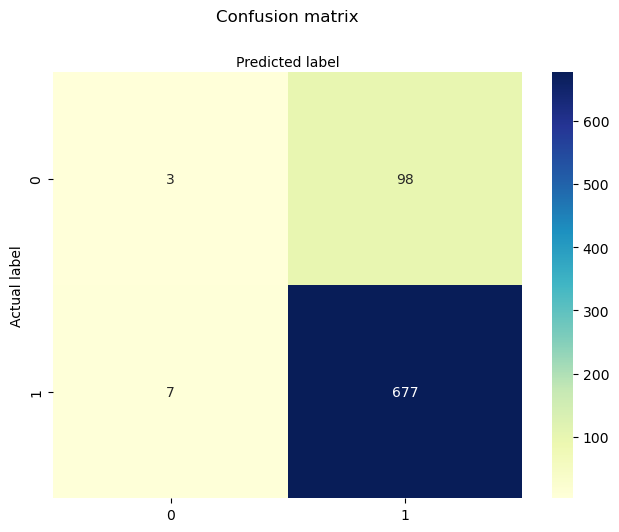

In [459]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [460]:
from sklearn.metrics import classification_report
target_names = ['living', 'dead']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      living       0.30      0.03      0.05       101
        dead       0.87      0.99      0.93       684

    accuracy                           0.87       785
   macro avg       0.59      0.51      0.49       785
weighted avg       0.80      0.87      0.82       785



## $$ \textit{ Cox Regression } $$

Documentation : 

$$ \textit{Cox reg} $$  **https://datatab.net/tutorial/cox-regression**

$$ \textit{Kaplan Meier Curve} $$ `pour gérer les patients encore vivant ("censoring")` 

**https://datatab.net/tutorial/kaplan-meier-curve**

## Cox proportional hazards model

The **Cox model** is used in survival analysis to estimate the **hazard** (instantaneous risk of death) as a function of covariates.

###  Hazard Function

The hazard for an individual *i* with feature vector $X_i$ is defined as:

$$
h(t \mid X_i) = h_0(t) \cdot \exp(X_i^\top \beta)
$$

- $h(t \mid X_i)$: hazard function at time $t$ given covariates $X_i$
- $h_0(t)$: **baseline hazard** (hazard when all covariates are 0)
- $\beta$: vector of coefficients learned by the model

### Interpretation

- $\exp(\beta_j)$ is the **hazard ratio (HR)** for a 1-unit increase in variable $X_j$.
- If $\exp(\beta_j) > 1$, the variable increases the risk.
- If $\exp(\beta_j) < 1$, the variable is protective.

### Partial Likelihood (simplified)

Cox regression **does not estimate $h_0(t)$** directly. Instead, it maximizes the **partial likelihood**:

$$
L(\beta) = \prod_{i: \delta_i = 1} \frac{\exp(X_i^\top \beta)}{\sum_{j \in R(t_i)} \exp(X_j^\top \beta)}
$$

- $\delta_i = 1$ if event (death) occurred for individual $i$, 0 if censored
- $R(t_i)$: risk set — individuals still under observation at time $t_i$



#### **Construction du dataset test pour Cox**

In [501]:
df_cox = df_final[['PATIENT_ID', 'MUTATION_EFFECT','TMB_NONSYNONYMOUS', 'VF', 'OS_MONTHS', 'OS_STATUS', 'SEX'
, 'VARIANT_IN_ONCOKB', 'Variant_Classification', 'ONCOTREE_CODE', 'CANCER_TYPE_DETAILED']]


df_cox_patient_level = df_cox.groupby('PATIENT_ID').agg({
    'MUTATION_EFFECT': lambda x: x.nunique(),  # ou x.mode()[0] ou un encodage binaire
    'TMB_NONSYNONYMOUS': 'mean',
    
    'SEX': 'first',
    'OS_MONTHS': 'first',
    'OS_STATUS': 'first',
    'Variant_Classification' : 'first',
    'VF' : 'mean',
    'ONCOTREE_CODE' : 'first',
    'CANCER_TYPE_DETAILED' : 'first'
    
    
}).reset_index()

# Affichage du résultat
df_cox_patient_level


,PATIENT_ID,MUTATION_EFFECT,TMB_NONSYNONYMOUS,SEX,OS_MONTHS,OS_STATUS,Variant_Classification,VF,ONCOTREE_CODE,CANCER_TYPE_DETAILED
0,P-0000280,2,0.083333,Female,111.516586,1:DECEASED,Missense_Mutation,0.372288,LUNG,Lung
1,P-0000391,1,0.066667,Male,80.678568,1:DECEASED,Missense_Mutation,0.594298,PRAD,Prostate Adenocarcinoma
2,P-0001300,1,0.033333,Female,107.308413,1:DECEASED,Missense_Mutation,0.308996,LUNG,Lung
3,P-0002942,1,0.033333,Female,115.330243,0:LIVING,Missense_Mutation,0.352941,BREAST,Breast
4,P-0004455,2,0.333333,Female,111.713844,0:LIVING,Missense_Mutation,0.309128,BREAST,Breast
...,...,...,...,...,...,...,...,...,...,...
333,P-0084980,1,0.100000,Female,11.736858,0:LIVING,Missense_Mutation,0.578292,EMBT,Embryonal Tumor
334,P-0085183,2,0.200000,Male,2.202716,1:DECEASED,Nonsense_Mutation,0.693299,LUNG,Lung
335,P-0085487,2,0.066667,Female,12.525890,1:DECEASED,Missense_Mutation,0.249096,PCNSMT,Primary CNS Melanocytic Tumors
336,P-0085834,3,1.400000,Male,0.756156,1:DECEASED,Missense_Mutation,0.341596,LUNG,Lung


In [502]:
df_cox_patient_level.to_csv('cox_dataset_for_R_analysis2.csv', index=False)


## $$ \textit{Metastatic Non-Small Cell Lung Cancer (MSK, Nature Medicine 2022)}  $$
<div align="center">

##  $$ \text{ Dataset management }$$

####  $$ \text{ clinical patient data }$$


In [44]:
import pandas as pd
file_name = 'nsclc_ctdx_msk_2022/data_clinical_patient.txt'

pd.set_option('display.max_columns', None)

df_metastatic = pd.read_csv(file_name, sep = "\t", skiprows=4)
df_metastatic.dropna(subset=['OS_STATUS','OS_MONTHS'])
df_not_na = df_metastatic.drop(['EXTRAPULMONARY', 'METABOLIC_TUMOR_VOL', 'ETHNICITY', 'RACE', 'AGE_CURRENT', 'STAGE_AT_DRAW'], axis=1)
df_not_na.dropna()
df_not_na.dropna().to_csv("data_patient.csv")




In [43]:
df_not_na.to_csv('first_try_lung_metastac.csv', index=False)


####  $$ \text{ clinical sample data }$$


In [6]:
file_name = 'nsclc_ctdx_msk_2022/data_clinical_sample.txt'

pd.set_option('display.max_columns', None)

df_metastatic_sample = pd.read_csv(file_name, sep = "\t", skiprows=4)
#df_metastatic_sample.dropna(subset=['OS_STATUS','OS_MONTHS'])
df_metastatic_sample_notna = df_metastatic_sample.dropna()
df_metastatic_sample['SAMPLE_TYPE'].unique()
#df_metastatic_sample['SAMPLE_CLASS'].unique()
#df_metastatic_sample[df_metastatic_sample['PATIENT_ID']=='P-0057860']

#df_metastatic_sample.columns
df_metastatic_sample.groupby('PATIENT_ID')['METASTATIC_SITE'].nunique()
# 1. Calculer le nombre de sites métastatiques uniques par patient
metastasis_count = df_metastatic_sample.groupby('PATIENT_ID')['METASTATIC_SITE'].nunique()

# 2. Ajouter cette information au DataFrame d'origine
# Si tu veux l’ajouter au même df (ex: df_metastatic_sample), fais un .map()
df_metastatic_sample['N_METASTATIC_SITES'] = df_metastatic_sample['PATIENT_ID'].map(metastasis_count)



df_metastatic_sample['SAMPLE_CLASS'].unique()

df_metastatic_sample.isna().sum()
#df_metastatic_sample = df_metastatic_sample.dropna()
df_metastatic_sample['METASTATIC_SITE'].unique()

df_metastatic_sample['SAMPLE_CLASS'].unique()
df_metastatic_sample.isna().sum()

SAMPLE_ID                       0
PATIENT_ID                      0
ONCOTREE_CODE                   0
CANCER_TYPE                     0
CANCER_TYPE_DETAILED            0
SAMPLE_CLASS                    0
GENE_PANEL                      0
SAMPLE_TYPE                     0
METASTATIC_SITE              1364
PRIMARY_SITE                 1364
TUMOR_PURITY                 1605
MSI_SCORE                    1390
MSI_TYPE                     1701
AGE_AT_SEQ_REPORTED_YEARS    1679
TMB_NONSYNONYMOUS            1364
N_METASTATIC_SITES              0
dtype: int64

In [7]:
# 1. Exclure les valeurs 'Not Applicable' avant de compter
df_filtered = df_metastatic_sample[df_metastatic_sample['METASTATIC_SITE'] != 'Not Applicable']

# 2. Calculer le nombre de sites métastatiques uniques par patient (hors 'Not Applicable')
metastasis_count = df_filtered.groupby('PATIENT_ID')['METASTATIC_SITE'].nunique()

# 3. Ajouter cette info au DataFrame d'origine
df_metastatic_sample['N_METASTATIC_SITES'] = df_metastatic_sample['PATIENT_ID'].map(metastasis_count)
df_metastatic_sample['N_METASTATIC_SITES'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [8]:
df_metastatic_sample[df_metastatic_sample['PATIENT_ID']=='P-0000840']

,SAMPLE_ID,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,GENE_PANEL,SAMPLE_TYPE,METASTATIC_SITE,PRIMARY_SITE,TUMOR_PURITY,MSI_SCORE,MSI_TYPE,AGE_AT_SEQ_REPORTED_YEARS,TMB_NONSYNONYMOUS,N_METASTATIC_SITES
899,MSK-L-877-001,P-0000840,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,cfDNA,ctDx_lung_panel,Metastasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1230,P-0000840-T01-IM3,P-0000840,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT341,Metastasis,Lymph Node,Lung,70,0.19,Stable,49,2.218311,1.0
1231,P-0000840-T03-IM6,P-0000840,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,Not Applicable,Lung,80,0.14,Stable,54,1.729396,1.0
2183,P-0000840-T02-XS1,P-0000840,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,cfDNA,ACCESS129,Primary,Not Applicable,Lung,default,-1.00,NaN,NaN,5.593686,1.0


####  $$ \text{ clinical sample data pretreatment }$$
---------
**full columns**

In [9]:
def get_useless_column(df):
    L = df.columns
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df[elt].isna().sum()
        
        if unique <= 0 : 
            LL.append(elt)

    return LL
            
        
liste_colonne_mutation_complètes = get_useless_column(df_metastatic_sample)
df_metastatic_sample=df_metastatic_sample[liste_colonne_mutation_complètes]
print(df_metastatic_sample.columns)

Index(['SAMPLE_ID', 'PATIENT_ID', 'ONCOTREE_CODE', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'SAMPLE_CLASS', 'GENE_PANEL', 'SAMPLE_TYPE'],
      dtype='object')


--------
**How many missing values in other columns**

In [10]:
df_metastatic_sample.isna().sum()
#df_sample_n_metas[df_sample_n_metas['PATIENT_ID']=='P-0040945']

SAMPLE_ID               0
PATIENT_ID              0
ONCOTREE_CODE           0
CANCER_TYPE             0
CANCER_TYPE_DETAILED    0
SAMPLE_CLASS            0
GENE_PANEL              0
SAMPLE_TYPE             0
dtype: int64

In [11]:
#df_metastatic_sample[df_metastatic_sample['PATIENT_ID']=='P-0040945']

####  $$ \text{ mutation data }$$


In [12]:
file_name = 'nsclc_ctdx_msk_2022/data_mutations.txt'

pd.set_option('display.max_columns', None)

df_metastatic_mut = pd.read_csv(file_name, sep = "\t", skiprows=2)
df_metastatic_mut

df_metastatic_mut['VAF'] = round(df_metastatic_mut['t_alt_count']/(df_metastatic_mut['t_alt_count']+df_metastatic_mut['t_ref_count']),4)
len(df_metastatic_mut['Tumor_Sample_Barcode'].unique())

df_metastatic_mut

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,Annotation_Status,Frequency,Hotspot,VAF
0,EGFR,1956,MSKCC,GRCh37,7,55242465,55242479,+,inframe_deletion,In_Frame_Del,DEL,GGAATTAAGAGAAGC,GGAATTAAGAGAAGC,-,rs121913421,NaN,P-0027419-T06-IM7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,491,131,430.0,0.0,ENST00000275493.2:c.2235_2249del,p.Glu746_Ala750del,p.E746_A750del,ENST00000275493,NM_005228.3,745.0,aaGGAATTAAGAGAAGCa/aaa,19/28,SUCCESS,NaN,0,0.2106
1,SDHA,6389,MSKCC,GRCh37,5,223682,223682,+,"missense_variant,splice_region_variant",Missense_Mutation,SNP,C,C,T,rs369321221,NaN,P-0027419-T06-IM7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,639,119,295.0,0.0,ENST00000264932.6:c.149C>T,p.Ser50Phe,p.S50F,ENST00000264932,NM_004168.2,50.0,tCc/tTc,2/15,SUCCESS,NaN,0,0.1570
2,SDHA,6389,MSKCC,GRCh37,5,223664,223664,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,NaN,P-0027419-T06-IM7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,839,152,368.0,0.0,ENST00000264932.6:c.131C>T,p.Ser44Phe,p.S44F,ENST00000264932,NM_004168.2,44.0,tCt/tTt,2/15,SUCCESS,NaN,0,0.1534
3,SDHA,6389,MSKCC,GRCh37,5,224491,224491,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,NaN,P-0027419-T06-IM7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,242,54,133.0,0.0,ENST00000264932.6:c.167C>T,p.Pro56Leu,p.P56L,ENST00000264932,NM_004168.2,56.0,cCa/cTa,3/15,SUCCESS,NaN,0,0.1824
4,SDHA,6389,MSKCC,GRCh37,5,224617,224617,+,missense_variant,Missense_Mutation,SNP,C,C,T,NaN,NaN,P-0027419-T06-IM7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,598,120,264.0,0.0,ENST00000264932.6:c.293C>T,p.Ser98Leu,p.S98L,ENST00000264932,NM_004168.2,98.0,tCa/tTa,3/15,SUCCESS,NaN,0,0.1671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,MET,4233,NaN,GRCh37,7,116411862,116411898,+,"splice_region_variant,intron_variant",Splice_Region,DEL,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,-,NaN,NaN,MSK-L-029-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1411,147,NaN,NaN,ENST00000397752.3:c.2888-39_2888-3del,NaN,p.X963_splice,ENST00000397752,NM_000245.2,963.0,NaN,NaN,SUCCESS,0.0943,0,0.0944
9729,MET,4233,NaN,GRCh37,7,116411862,116411898,+,"splice_region_variant,intron_variant",Splice_Region,DEL,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,-,NaN,NaN,MSK-L-029-002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3903,1011,NaN,NaN,ENST00000397752.3:c.2888-39_2888-3del,NaN,p.X963_splice,ENST00000397752,NM_000245.2,963.0,NaN,NaN,SUCCESS,0.2057,0,0.2057
9730,EGFR,1956,NaN,GRCh37,7,55242469,55242469,+,synonymous_variant,Silent,SNP,T,T,C,rs397517095,NaN,MSK-L-744-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022,19,NaN,NaN,ENST00000275493.2:c.2239T>C,p.Leu747=,p.L747=,ENST00000275493,NM_005228.3,747.0,Tta/Cta,19/28,SUCCESS,0.0171,0,0.0183
9731,EGFR,1956,NaN,GRCh37,7,55242469,55242469,+,synonymous_variant,Silent,SNP,T,T,C,rs397517095,NaN,NCI-L-081-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6476,95314,NaN,NaN,ENST00000275493.2:c.2239T>C,p.

####  $$ \text{ mutation data pretreatment }$$
------
**Getting only full columns**

In [13]:
def get_useless_column(df):
    L = df.columns
    unique = 0
    l = 0
    LL = []
    for elt in L:
        unique = df[elt].isna().sum()
        
        if unique == 0 : 
            LL.append(elt)

    return LL, len(LL)
            
df_metastatic_mut    
df_metastatic_mut = df_metastatic_mut.rename(columns={'Tumor_Sample_Barcode': 'SAMPLE_ID'})

liste_colonne_mutation_complètes = get_useless_column(df_metastatic_mut)

df_metastatic_mut = df_metastatic_mut[['Hugo_Symbol', 'Entrez_Gene_Id', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'SAMPLE_ID', 't_ref_count', 't_alt_count', 'Transcript_ID', 'Annotation_Status', 'Hotspot']]
df_metastatic_mut['VAF'] = round(df_metastatic_mut['t_alt_count']/(df_metastatic_mut['t_alt_count']+df_metastatic_mut['t_ref_count']),4)

df_metastatic_mut['SAMPLE_ID'].str[:9].unique()[0]



df_metastatic_mut

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,SAMPLE_ID,t_ref_count,t_alt_count,Transcript_ID,Annotation_Status,Hotspot,VAF
0,EGFR,1956,GRCh37,7,55242465,55242479,+,inframe_deletion,In_Frame_Del,DEL,GGAATTAAGAGAAGC,GGAATTAAGAGAAGC,-,P-0027419-T06-IM7,491,131,ENST00000275493,SUCCESS,0,0.2106
1,SDHA,6389,GRCh37,5,223682,223682,+,"missense_variant,splice_region_variant",Missense_Mutation,SNP,C,C,T,P-0027419-T06-IM7,639,119,ENST00000264932,SUCCESS,0,0.1570
2,SDHA,6389,GRCh37,5,223664,223664,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0027419-T06-IM7,839,152,ENST00000264932,SUCCESS,0,0.1534
3,SDHA,6389,GRCh37,5,224491,224491,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0027419-T06-IM7,242,54,ENST00000264932,SUCCESS,0,0.1824
4,SDHA,6389,GRCh37,5,224617,224617,+,missense_variant,Missense_Mutation,SNP,C,C,T,P-0027419-T06-IM7,598,120,ENST00000264932,SUCCESS,0,0.1671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9728,MET,4233,GRCh37,7,116411862,116411898,+,"splice_region_variant,intron_variant",Splice_Region,DEL,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,-,MSK-L-029-001,1411,147,ENST00000397752,SUCCESS,0,0.0944
9729,MET,4233,GRCh37,7,116411862,116411898,+,"splice_region_variant,intron_variant",Splice_Region,DEL,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,TAGCCGTCTTTAACAAGCTCTTTCTTTCTCTCTGTTT,-,MSK-L-029-002,3903,1011,ENST00000397752,SUCCESS,0,0.2057
9730,EGFR,1956,GRCh37,7,55242469,55242469,+,synonymous_variant,Silent,SNP,T,T,C,MSK-L-744-001,1022,19,ENST00000275493,SUCCESS,0,0.0183
9731,EGFR,1956,GRCh37,7,55242469,55242469,+,synonymous_variant,Silent,SNP,T,T,C,NCI-L-081-01,6476,95314,ENST00000275493,SUCCESS,0,0.9364


----------------
file_name = 'nsclc_ctdx_msk_2022/data_timeline_status.txt'

-----------------

In [14]:
file_name = 'nsclc_ctdx_msk_2022/data_timeline_treatment.txt'

pd.set_option('display.max_columns', None)

df_metastatic_treat = pd.read_csv(file_name, sep = "\t", skiprows=0)
df_metastatic_treat['TREATMENT_TYPE'].unique()
df_metastatic_treat

,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,TREATMENT_TYPE
0,P-0003322,1180,NaN,Treatment,Targeted Therapy
1,MSK-L-007,314,NaN,Treatment,Targeted Therapy
2,P-0017214,497,NaN,Treatment,Targeted Therapy
3,P-0034677,21,NaN,Treatment,Targeted Therapy
4,P-0022097,303,NaN,Treatment,Targeted Therapy
...,...,...,...,...,...
413,NCI-L-184,1802,NaN,Treatment,Targeted Therapy
414,NCI-L-188,239,NaN,Treatment,Targeted Therapy
415,NCI-L-196,1306,NaN,Treatment,Targeted Therapy
416,NCI-L-201,365,NaN,Treatment,Targeted Therapy


## $$ \text{ Dataset merging } $$

Merge data_sample et data_mut on `SAMPLE_ID` = `Tumor_Sample_Barcode`

In [15]:
df_metastatic_mut = df_metastatic_mut.rename(columns={'Tumor_Sample_Barcode': 'SAMPLE_ID'})

df_metastatic_sample['SAMPLE_ID'] = df_metastatic_sample['SAMPLE_ID'].astype(str).str.strip()
df_metastatic_mut['SAMPLE_ID'] = df_metastatic_mut['SAMPLE_ID'].astype(str).str.strip()

df_sample_mutation = df_metastatic_sample.merge(df_metastatic_mut, on='SAMPLE_ID', how='left')

df_sample_mutation['SAMPLE_CLASS'].unique()

array(['cfDNA', 'Tumor'], dtype=object)

In [16]:
df_sample_mutation = df_sample_mutation[df_sample_mutation['Hugo_Symbol'].notna()]
df_sample_mutation['SAMPLE_CLASS'].unique()

array(['cfDNA', 'Tumor'], dtype=object)

In [17]:
df_sample_mutation['SAMPLE_TYPE'].unique()

array(['Metastasis', 'Primary', 'Unknown', 'Local Recurrence'],
      dtype=object)

#### $$ \text{ number of ctDNA alteration } $$

In [18]:
ctdna_df = df_sample_mutation[df_sample_mutation['SAMPLE_CLASS'] == 'cfDNA']
ctdna_alteration_counts = (
    ctdna_df
    .groupby('PATIENT_ID')
    .size()
    .reset_index(name='N_CTDNA_ALTERATIONS_y')
)


df_sample_mutation['PATIENT_ID'] = df_sample_mutation['PATIENT_ID'].astype(str).str.strip()
ctdna_alteration_counts['PATIENT_ID'] = (
    ctdna_alteration_counts['PATIENT_ID']
    .astype(str).str.strip()
)
df_sample_mutations = df_sample_mutation.merge(ctdna_alteration_counts, on='PATIENT_ID', how='left')
df_sample_mutations
len(df_sample_mutations['PATIENT_ID'].unique())
#DF = df_sample_mutations[df_sample_mutations['PATIENT_ID']=='P-0016223']
#DF[DF['SAMPLE_CLASS']=='cfDNA']
df_sample_mutations[df_sample_mutations['N_CTDNA_ALTERATIONS_y'].isna()]
df_sample_mutations[df_sample_mutations['PATIENT_ID']=='P-0006047']
df_sample_mutations
df_sample_mutations['VAF_sup_median'] = df_sample_mutations['VAF'] >= 0.8746
df_sample_mutations['N_CTDNA_ALTERATIONS_y'].unique()



array([ 8.,  1.,  3.,  2.,  4., 20., 10.,  5.,  6., 12., 34.,  7., 11.,
       14., 18., 22., 21., 30.,  9., 29., 46., 33., 62., 13., 23., nan])

In [19]:
# Supposons que votre DataFrame porte le nom df_sample_mutations
# et qu’il contient au moins les colonnes 'PATIENT_ID', 'N_CTDNA_ALTERATIONS' et 'VAF'.

import pandas as pd

# 1) On normalise le PATIENT_ID (strip espaces, si nécessaire)
df = df_sample_mutations.copy()
df['PATIENT_ID'] = df['PATIENT_ID'].astype(str).str.strip()

# 2) On construit le nouveau DataFrame, une ligne par patient
df_patient = (
    df
    .groupby('PATIENT_ID')
    .agg({
        'N_CTDNA_ALTERATIONS_y': 'first',   # première valeur rencontrée
        'VAF': 'max'                      # valeur max de VAF
    })
    .reset_index()
)

# Résultat
print(df_patient.shape)       # devrais afficher (nombre de patients, 3)
print(df_patient.head())      # aperçu

# Si vous aviez d’autres colonnes cliniques à conserver (ex. SEX, OS_MONTHS, etc.),
# vous pouvez les récupérer via un merge “left” sur df_patient avec un DataFrame
# pré-filtré où chaque patient n’apparaît qu’une seule fois.

df_patient
#df_sample_mutations.to_csv('cox_dataset_nctdna.csv', index=False)
df_patient['N_CTDNA_ALTERATIONS_y'].unique()
# Remplacer les NaN par 0 dans la colonne
df_patient['N_CTDNA_ALTERATIONS_y'] = df_patient['N_CTDNA_ALTERATIONS_y'].fillna(0)
df_patient['N_CTDNA_ALTERATIONS_y'].unique()
df_patient.isna().sum()

(930, 3)
  PATIENT_ID  N_CTDNA_ALTERATIONS_y     VAF
0  MSK-L-007                    3.0  0.0243
1  MSK-L-011                    2.0  0.0016
2  MSK-L-015                    2.0  0.0812
3  MSK-L-020                    2.0  0.2990
4  MSK-L-023                    1.0  0.0030


PATIENT_ID               0
N_CTDNA_ALTERATIONS_y    0
VAF                      0
dtype: int64

In [20]:
# Supposons que :
# - df_not_na contient déjà vos échantillons filtrés (avec possiblement plusieurs lignes par patient)
# - df_unique contient EXACTEMENT une ligne par patient (les colonnes N_CTDNA_ALTERATIONS et VAF agrégées)

df_merged = df_not_na.dropna().merge(
    df_patient,
    on='PATIENT_ID',
    how='left'    # garde toutes les lignes de df_not_na
)
#print(df_not_na.isna().sum(), "------------" , df_patient.isna().sum())
# Vérification
#print(df_not_na.shape, "→", df_merged.shape)
#print(df_merged[['PATIENT_ID', 'N_CTDNA_ALTERATIONS', 'VAF']].head(10))
df_merged['n_ctdna_sup_one'] = df_merged['N_CTDNA_ALTERATIONS_y'] >= 1
df_patient['N_CTDNA_ALTERATIONS_y'] = df_patient['N_CTDNA_ALTERATIONS_y'].fillna(0)

df_merged['N_CTDNA_ALTERATIONS_y'].unique()

df_merged[df_merged['PATIENT_ID'] == 'P-0015636']
#print(df_merged.isna().sum())

df_missing_vaf_CTDNA = df_merged[df_merged['VAF'].isna()]
df_missing_vaf_CTDNA['PATIENT_ID'].unique()


df_merged['VAF'].dropna().median

df_merged['VAF_sup_median'] = df_merged['VAF'] >= 0.8746

df_merged['cancer_not_adeno'] = df_merged['HISTOLOGY'] != 'Adenocarcinoma'
df_merged

,PATIENT_ID,PATIENT_DISPLAY_NAME,HISTOLOGY,PRIOR_TREATMENT,SEX,OS_STATUS,OS_MONTHS,SUCCESSFUL_CTDX_LUNG,SITE,AGE_GT_MEDIAN,SMOKING_STATUS,N_CTDNA_ALTERATIONS_y,VAF,n_ctdna_sup_one,VAF_sup_median,cancer_not_adeno
0,MSK-L-001,MSK-L-001,Squamous Cell Carcinoma,True,Male,1:DECEASED,14.586071,True,MSK,False,True,NaN,NaN,False,False,True
1,P-0016223,MSK-L-002,Other,True,Male,0:LIVING,65.867280,True,MSK,False,True,8.0,0.8746,True,True,True
2,MSK-L-003,MSK-L-003,Adenocarcinoma,True,Male,0:LIVING,55.551905,True,MSK,False,True,NaN,NaN,False,False,False
3,P-0017832,MSK-L-004,Adenocarcinoma,True,Female,1:DECEASED,7.227332,True,MSK,False,True,1.0,0.0515,True,False,False
4,P-0015636,MSK-L-005,Adenocarcinoma,False,Female,1:DECEASED,3.942181,True,MSK,False,True,0.0,0.1319,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,NCI-L-197,NCI-L-197,Adenocarcinoma,True,Female,1:DECEASED,18.528252,True,Sydney,True,True,NaN,NaN,False,False,False
1098,NCI-L-199,NCI-L-199,Adenocarcinoma,True,Male,1:DECEASED,145.827858,True,Sydney,False,False,5.0,0.5409,True,False,False
1099,NCI-L-200,NCI-L-200,Adenocarcinoma,False,Male,1:DECEASED,15.900131,True,Sydney,False,True,NaN,NaN,False,False,False
1100,NCI-L-201,NCI-L-201,Adenocarcinoma,True,Female,0:LIVING,11.990802,True,Sydney,False,False,NaN,NaN,False,False,False


In [21]:
df_merged.to_csv('cox_dataset_2.csv', index=False)
df_sample_mutations['SAMPLE_CLASS'].unique()

array(['cfDNA', 'Tumor'], dtype=object)

PAT = ['MSK-L-001', 'MSK-L-003', 'MSK-L-016', 'MSK-L-019', 'MSK-L-024',
       'MSK-L-034', 'MSK-L-040', 'MSK-L-048', 'MSK-L-050', 'MSK-L-056',
       'MSK-L-058', 'MSK-L-064', 'MSK-L-070', 'MSK-L-072', 'P-0022427',
       'MSK-L-086', 'MSK-L-092', 'MSK-L-096', 'MSK-L-102', 'MSK-L-104',
       'MSK-L-112', 'P-0025103', 'MSK-L-126', 'P-0040252', 'MSK-L-141',
       'P-0025095', 'MSK-L-188', 'MSK-L-213', 'MSK-L-219', 'MSK-L-230',
       'MSK-L-248', 'P-0027166', 'MSK-L-257', 'MSK-L-259', 'MSK-L-270',
       'MSK-L-279', 'P-0041246', 'MSK-L-313', 'MSK-L-319', 'MSK-L-321',
       'MSK-L-354', 'MSK-L-359', 'MSK-L-360', 'MSK-L-365', 'MSK-L-366',
       'P-0031865', 'MSK-L-390', 'MSK-L-393', 'MSK-L-402', 'P-0036234',
       'MSK-L-413', 'P-0032268', 'MSK-L-430', 'MSK-L-448', 'P-0038518',
       'MSK-L-462', 'P-0034334', 'MSK-L-500', 'MSK-L-515', 'MSK-L-525',
       'MSK-L-547', 'MSK-L-554', 'MSK-L-563', 'MSK-L-565', 'MSK-L-570',
       'MSK-L-577', 'MSK-L-587', 'MSK-L-588', 'MSK-L-602', 'MSK-L-615',
       'MSK-L-640', 'MSK-L-645', 'MSK-L-648', 'MSK-L-651', 'MSK-L-655',
       'P-0021671', 'P-0039863', 'MSK-L-680', 'MSK-L-681', 'MSK-L-685',
       'MSK-L-691', 'MSK-L-703', 'MSK-L-732', 'P-0041575', 'MSK-L-743',
       'MSK-L-748', 'MSK-L-750', 'MSK-L-757', 'MSK-L-760', 'MSK-L-764',
       'MSK-L-793', 'MSK-L-796', 'MSK-L-797', 'MSK-L-803', 'MSK-L-817',
       'MSK-L-820', 'MSK-L-830', 'MSK-L-842', 'MSK-L-844', 'MSK-L-884',
       'MSK-L-888', 'MSK-L-891', 'P-0044937', 'MSK-L-901', 'MSK-L-912',
       'MSK-L-917', 'P-0045265', 'P-0046627', 'MSK-L-931', 'MSK-L-933',
       'MSK-L-941', 'MSK-L-944', 'MSK-L-954', 'P-0047186', 'MSK-L-977',
       'MSK-L-993', 'P-0048870', 'P-0049136', 'MSK-L-1048', 'MSK-L-1050',
       'P-0050396', 'MSK-L-1066', 'MSK-L-1079', 'P-0052088', 'MSK-L-1142',
       'P-0056459', 'NCI-L-001', 'NCI-L-002', 'NCI-L-004', 'NCI-L-005',
       'NCI-L-007', 'NCI-L-008', 'NCI-L-011', 'NCI-L-012', 'NCI-L-014',
       'NCI-L-017', 'NCI-L-024', 'NCI-L-026', 'NCI-L-028', 'NCI-L-030',
       'NCI-L-033', 'NCI-L-042', 'NCI-L-043', 'NCI-L-044', 'NCI-L-045',
       'NCI-L-046', 'NCI-L-050', 'NCI-L-060', 'NCI-L-062', 'NCI-L-064',
       'NCI-L-065', 'NCI-L-066', 'NCI-L-068', 'NCI-L-070', 'NCI-L-071',
       'NCI-L-074', 'NCI-L-075', 'NCI-L-080', 'NCI-L-091', 'NCI-L-093',
       'NCI-L-094', 'NCI-L-095', 'NCI-L-097', 'NCI-L-098', 'NCI-L-099',
       'NCI-L-109', 'NCI-L-111', 'NCI-L-112', 'NCI-L-118', 'NCI-L-120',
       'NCI-L-122', 'NCI-L-123', 'NCI-L-133', 'NCI-L-151', 'NCI-L-163',
       'NCI-L-166', 'NCI-L-182', 'NCI-L-184', 'NCI-L-186', 'NCI-L-188',
       'NCI-L-194', 'NCI-L-196', 'NCI-L-197', 'NCI-L-200', 'NCI-L-201',
       'NCI-L-202']
df_test = df_metastatic_mut[df_metastatic_mut['SAMPLE_ID'].str[:9].isin(PAT)]

df_test
#df_test
print(len(PAT), df_test.shape)
#pat = df_test['SAMPLE_ID'].str[:9].unique()
#pat

df_test[df_test['PATIENT_ID'] == 'NCI-L-174']

for elt in pat:
    if df_merged['PATIENT_ID']==elt]['VAF'].isna():
        df_merged[elt]['VAF'] = df_test[elt]['VAF'] 
df_merged.isna().sum()

df_merged['MSK-L-104']

In [22]:
df_merged[df_merged['PATIENT_ID']=='MSK-L-104']

,PATIENT_ID,PATIENT_DISPLAY_NAME,HISTOLOGY,PRIOR_TREATMENT,SEX,OS_STATUS,OS_MONTHS,SUCCESSFUL_CTDX_LUNG,SITE,AGE_GT_MEDIAN,SMOKING_STATUS,N_CTDNA_ALTERATIONS_y,VAF,n_ctdna_sup_one,VAF_sup_median,cancer_not_adeno
96,MSK-L-104,MSK-L-104,Squamous Cell Carcinoma,False,Male,1:DECEASED,6.865966,True,MSK,True,True,NaN,NaN,False,False,True


In [23]:
df_sample_mutations.shape[0]

9733

In [24]:
PAT = unique_patient(df_sample_mutations) 
df_test = df_sample_mutations[df_sample_mutations['PATIENT_ID'].isin(PAT)]
df_test['Tumor_ONLY'] = df_sample_mutations['N_CTDNA_ALTERATIONS_y']==0

df_test
df_test.drop(['Tumor_ONLY'], axis=1)
df_test.to_csv("dataset_reseau_neuronne.csv")
df_test['PATIENT_ID'].value_counts()

NameError: name 'unique_patient' is not defined

In [25]:
df_sample_mutations[df_sample_mutations['PATIENT_ID']=='P-0058303']

df_sample_mutations.dropna().to_csv("cox_dataset_3.csv")
len(df_sample_mutations['PATIENT_ID'].unique())
df_sample_mutations.columns

def unique_patient(df): 
    pat = df['PATIENT_ID'].unique()
    unique_patient = []
    for elt in pat:
        if df[df['PATIENT_ID']==elt].shape[0] in ([1,2,3,4,5,10,12,19,20,21,23,24,26,22]) :
            unique_patient.append(elt)
    return unique_patient

len(unique_patient(df_sample_mutations))
#df_sample_mutations

531

In [26]:
PAT = unique_patient(df_sample_mutations) 
df_test = df_sample_mutations
df_test['Tumor_ONLY'] = df_sample_mutations['N_CTDNA_ALTERATIONS_y']==0
df_test[df_test['PATIENT_ID']=='MSK-L-007'	]
df_metastatic.isna().sum()

PATIENT_ID                0
PATIENT_DISPLAY_NAME      0
HISTOLOGY                10
PRIOR_TREATMENT          25
STAGE_AT_DRAW           135
AGE_CURRENT             382
SEX                      10
OS_STATUS                 0
OS_MONTHS                 0
RACE                    382
ETHNICITY               386
SUCCESSFUL_CTDX_LUNG      0
SITE                     15
AGE_GT_MEDIAN            25
SMOKING_STATUS           25
EXTRAPULMONARY          670
METABOLIC_TUMOR_VOL     999
dtype: int64

In [27]:
agg_df.columns

NameError: name 'agg_df' is not defined

In [28]:
# 1. Garder uniquement les colonnes nécessaires de df_not_na
df_survival_info = df_not_na[['PATIENT_ID', 'OS_MONTHS', 'OS_STATUS']]

# 2. Merge sur 'PATIENT_ID' (left join pour garder toutes les lignes de df_sample_mutations)
df_sample_mutations_merged = df_test.merge(df_survival_info, on='PATIENT_ID', how='left')
df_sample_mutations_merged['ctDNA_sup_one'] = df_sample_mutations_merged['N_CTDNA_ALTERATIONS_y']>1
#df_sample_mutations_merged= df_sample_mutations_merged[['PATIENT_ID', 'ONCOTREE_CODE',	'CANCER_TYPE',	
                                        #                'CANCER_TYPE_DETAILED', 'VAF',	'N_CTDNA_ALTERATIONS_y',
                                        #                'Tumor_ONLY',	'OS_MONTHS',	'OS_STATUS',	'ctDNA_sup_one']]
df_sample_mutations_merged['VAF_REAL'] = df_sample_mutations_merged['t_alt_count']/(df_sample_mutations_merged['t_alt_count']+df_sample_mutations_merged['t_ref_count'])
df_sample_mutations_merged.dropna().to_csv("dataset_reseau_neuronne_V5.csv")
df_sample_mutations_merged.dropna()



df_sample_mutations_merged['N_CTDNA_ALTERATIONS_y'].value_counts()
df_sample_mutations_merged['PATIENT_ID'].value_counts()


PATIENT_ID
P-0021769    176
P-0035181    157
P-0053245    151
P-0019687    112
P-0033251     89
            ... 
P-0038442      1
MSK-L-253      1
P-0039945      1
P-0027009      1
MSK-L-355      1
Name: count, Length: 930, dtype: int64

In [29]:
# Étape 1 : Compter le nombre d'occurrences de chaque patient
patient_counts = df_sample_mutations_merged['PATIENT_ID'].value_counts()

# Étape 2 : Filtrer pour ne garder que les patients avec +1 mutation
patients_to_keep = patient_counts[patient_counts < 40].index

# Étape 3 : Filtrer le DataFrame original
df_sample_mutations_merged1 = df_sample_mutations_merged[df_sample_mutations_merged['PATIENT_ID'].isin(patients_to_keep)]


#df_sample_mutations_merged1.dropna().to_csv("dataset_reseau_neuronne_V5.csv")
df_sample_mutations_merged1['SAMPLE_TYPE'].value_counts()
df_sample_mutations_merged1[df_sample_mutations_merged1['PATIENT_ID']=="P-0040145"]

,SAMPLE_ID,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,GENE_PANEL,SAMPLE_TYPE,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Transcript_ID,Annotation_Status,Hotspot,VAF,N_CTDNA_ALTERATIONS_y,VAF_sup_median,Tumor_ONLY,OS_MONTHS,OS_STATUS,ctDNA_sup_one,VAF_REAL
663,MSK-L-683-001,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,cfDNA,ctDx_lung_panel,Metastasis,EGFR,1956.0,GRCh37,7,55259515.0,55259515.0,+,missense_variant,Missense_Mutation,SNP,T,T,G,1245.0,51.0,ENST00000275493,SUCCESS,0.0,0.0394,1.0,False,False,33.311432,1:DECEASED,False,0.039352
5909,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,EGFR,1956.0,GRCh37,7,55259515.0,55259515.0,+,missense_variant,Missense_Mutation,SNP,T,T,G,396.0,4440.0,ENST00000275493,SUCCESS,0.0,0.9181,1.0,True,False,33.311432,1:DECEASED,False,0.918114
5910,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,RB1,5925.0,GRCh37,13,49047527.0,49047527.0,+,splice_donor_variant,Splice_Site,SNP,G,G,T,190.0,18.0,ENST00000267163,SUCCESS,0.0,0.0865,1.0,False,False,33.311432,1:DECEASED,False,0.086538
5911,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,TP53,7157.0,GRCh37,17,7576928.0,7576928.0,+,splice_acceptor_variant,Splice_Site,SNP,T,T,A,416.0,107.0,ENST00000269305,SUCCESS,0.0,0.2046,1.0,False,False,33.311432,1:DECEASED,False,0.204589
5912,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,ZFHX3,463.0,GRCh37,16,72845502.0,72845502.0,+,missense_variant,Missense_Mutation,SNP,C,C,T,410.0,24.0,ENST00000268489,SUCCESS,0.0,0.0553,1.0,False,False,33.311432,1:DECEASED,False,0.055300
5913,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,PAK7,0.0,GRCh37,20,9543544.0,9543544.0,+,missense_variant,Missense_Mutation,SNP,T,T,C,340.0,19.0,ENST00000353224,SUCCESS,0.0,0.0529,1.0,False,False,33.311432,1:DECEASED,False,0.052925
5914,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,LATS1,9113.0,GRCh37,6,150005029.0,150005029.0,+,stop_gained,Nonsense_Mutation,SNP,G,G,C,264.0,16.0,ENST00000253339,SUCCESS,0.0,0.0571,1.0,False,False,33.311432,1:DECEASED,False,0.057143
5915,P-0040145-T01-IM6,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT468,Primary,RBM10,8241.0,GRCh37,X,47034440.0,47034440.0,+,frameshift_variant,Frame_Shift_Del,DEL,C,C,-,558.0,71.0,ENST00000329236,SUCCESS,0.0,0.1129,1.0,False,False,33.311432,1:DECEASED,False,0.112878
5916,P-0040145-T03-IM7,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT505,Primary,TP53,7157.0,GRCh37,17,7577539.0,7577539.0,+,missense_variant,Missense_Mutation,SNP,G,G,A,454.0,33.0,ENST00000269305,SUCCESS,0.0,0.0678,1.0,False,False,33.311432,1:DECEASED,False,0.067762
5917,P-0040145-T03-IM7,P-0040145,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Tumor,IMPACT505,Primary,TP53,7157.0,GRCh37,17,7577046.0,7577046.0,+,stop_gained,Nonsense_Mutation,SNP,C,C,A,527.0,90.0,ENST00000269305,SUCCESS,0.0,0.1459,1.0,False,False,33.311432,1:DECEASED,False,0.145867


In [30]:
tumor_df = df_sample_mutations_merged[df_sample_mutations_merged['SAMPLE_CLASS'] == 'Tumor']
tumor_alteration_counts = (
    tumor_df
    .groupby('PATIENT_ID')
    .size()
    .reset_index(name='N_Tumor_ALTERATIONS_y')
)


df_sample_mutations_merged['PATIENT_ID'] = df_sample_mutations_merged['PATIENT_ID'].astype(str).str.strip()
tumor_alteration_counts['PATIENT_ID'] = (
    tumor_alteration_counts['PATIENT_ID']
    .astype(str).str.strip()
)
df_sample_mutations_mergedd = df_sample_mutations_merged.merge(tumor_alteration_counts, on='PATIENT_ID', how='left')

df_sample_mutations_mergedd['N_CTDNA_ALTERATIONS_y'] = df_sample_mutations_mergedd['N_CTDNA_ALTERATIONS_y'].fillna(0)
df_sample_mutations_mergedd['N_Tumor_ALTERATIONS_y'] = df_sample_mutations_mergedd['N_Tumor_ALTERATIONS_y'].fillna(0)

#df_sample_mutations_mergedd[df_sample_mutations_mergedd['PATIENT_ID']=='NCI-L-199']

#missing_Tumor= df_sample_mutations_mergedd[df_sample_mutations_mergedd['N_Tumor_ALTERATIONS_y'].isna()]
df_sample_mutations_mergedd["Discordance_Jaccard_Score"]= df_sample_mutations_mergedd["N_CTDNA_ALTERATIONS_y"]/(df_sample_mutations_mergedd["N_CTDNA_ALTERATIONS_y"]+df_sample_mutations_mergedd["N_Tumor_ALTERATIONS_y"])
df_sample_mutations_mergedd["Discordance_Jaccard_Score_sup0.5"] =df_sample_mutations_mergedd["Discordance_Jaccard_Score"] > 0.5
df_sample_mutations_mergedd['ctDNA_sup_12'] = df_sample_mutations_mergedd["N_CTDNA_ALTERATIONS_y"] > 12
df_sample_mutations_mergedd['ctDNA_sup_18'] = df_sample_mutations_mergedd["N_CTDNA_ALTERATIONS_y"] > 18
df_sample_mutations_mergedd["Discordance_Jaccard_Score_sup0.7"] =df_sample_mutations_mergedd["Discordance_Jaccard_Score"] > 0.7

df_sample_mutations_mergedd["Discordance_Jaccard_Score_sup0.9"] =df_sample_mutations_mergedd["Discordance_Jaccard_Score"] > 0.9
df_sample_mutations_mergedd["Discordance_Jaccard_Score_inf0.2"] =df_sample_mutations_mergedd["Discordance_Jaccard_Score"] < 0.2
df_sample_mutations_mergedd["Discordance_Jaccard_Score_inf0.3"] =df_sample_mutations_mergedd["Discordance_Jaccard_Score"] < 0.3


In [32]:

agg_df = df_sample_mutations_mergedd.groupby('PATIENT_ID').agg({
    'ONCOTREE_CODE': 'first',

    'CANCER_TYPE': 'first',
    'CANCER_TYPE_DETAILED': 'first',
    
    'OS_MONTHS': 'first',
    'OS_STATUS': 'first',
    
    'ctDNA_sup_one': 'first',
    
    'N_Tumor_ALTERATIONS_y' : 'first',
    'N_CTDNA_ALTERATIONS_y': 'first',
    
    'Discordance_Jaccard_Score' : 'first',
    
    "Discordance_Jaccard_Score_sup0.5" : 'first',
    "Discordance_Jaccard_Score_sup0.7" : 'first',
    "Discordance_Jaccard_Score_sup0.9" : 'first',
    
    "Discordance_Jaccard_Score_inf0.2" : 'first',
    "Discordance_Jaccard_Score_inf0.3" : 'first'
  }).reset_index()

"""
agg_df = df_sample_mutations_mergedd.groupby('PATIENT_ID').agg({
    
    'OS_STATUS': 'first',
    'OS_MONTHS' : 'first',
    'Tumor_ONLY': 'first',
    'CANCER_TYPE': 'first',
   
    'Discordance_Jaccard_Score' : 'first',
    'ctDNA_sup_one': 'first',
    
    'N_Tumor_ALTERATIONS_y' : 'first',
    'N_CTDNA_ALTERATIONS_y': 'first',
    'Hugo_Symbol': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    
    "Discordance_Jaccard_Score_sup0.7" : 'first',
    "Discordance_Jaccard_Score_sup0.5" : 'first'
    
   
  }).reset_index()
"""
def bin_jaccard(score):
    if score < 0.2:
        return 0
    elif score < 0.8:
        return 1
    else:
        return 2

agg_df['Jaccard_binned'] = agg_df['Discordance_Jaccard_Score'].apply(bin_jaccard)

# 3. Créer un ratio : ctDNA / Tumor_ALTERATIONS
agg_df['ctDNA_Tumor_ratio'] = agg_df['N_CTDNA_ALTERATIONS_y'] / (agg_df['N_Tumor_ALTERATIONS_y'] + 1e-6)

# 4. Normaliser OS_MONTHS entre 0 et 1 pour s'en servir comme pondération
# (facultatif : tu peux aussi l'utiliser comme feature brute)
#agg_df['OS_MONTHS_norm'] = (agg_df1['OS_MONTHS'] - agg_df1['OS_MONTHS'].min()) / (agg_df1['OS_MONTHS'].max() - agg_df1['OS_MONTHS'].min())

#'VAF': 'mean','ctDNA_sup_12' : 'first',
#"Discordance_Jaccard_Score_sup0.5" : 'first','Tumor_ONLY': 'first',CANCER_TYPE': 'first',
#    "Discordance_Jaccard_Score_sup0.7" : 'first',

agg_df.dropna().to_csv("dataset_reseau_neuronne_V5.csv")
agg_df["N_CTDNA_ALTERATIONS_y"].value_counts()

agg_df

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,OS_MONTHS,OS_STATUS,ctDNA_sup_one,N_Tumor_ALTERATIONS_y,N_CTDNA_ALTERATIONS_y,Discordance_Jaccard_Score,Discordance_Jaccard_Score_sup0.5,Discordance_Jaccard_Score_sup0.7,Discordance_Jaccard_Score_sup0.9,Discordance_Jaccard_Score_inf0.2,Discordance_Jaccard_Score_inf0.3,Jaccard_binned,ctDNA_Tumor_ratio
0,MSK-L-007,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,21.484888,1:DECEASED,True,0.0,3.0,1.000000,True,True,True,False,False,2,3.000000e+06
1,MSK-L-011,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,11.202365,1:DECEASED,True,0.0,2.0,1.000000,True,True,True,False,False,2,2.000000e+06
2,MSK-L-015,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,61.662286,0:LIVING,True,0.0,2.0,1.000000,True,True,True,False,False,2,2.000000e+06
3,MSK-L-020,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,8.869908,1:DECEASED,True,0.0,2.0,1.000000,True,True,True,False,False,2,2.000000e+06
4,MSK-L-023,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,1.149803,0:LIVING,False,0.0,1.0,1.000000,True,True,True,False,False,2,1.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,P-0058303,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,15.111695,0:LIVING,True,12.0,8.0,0.400000,False,False,False,False,False,1,6.666666e-01
926,P-0058613,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,3.646518,1:DECEASED,True,0.0,12.0,1.000000,True,True,True,False,False,2,1.200000e+07
927,P-0058614,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,15.013141,0:LIVING,True,6.0,2.0,0.250000,False,False,False,False,True,1,3.333333e-01
928,P-0059005,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,13.797635,0:LIVING,True,6.0,12.0,0.666667,True,False,False,False,False,1,2.000000e+00


In [33]:

df_metastaticc = df_metastatic[['SMOKING_STATUS', 'PATIENT_ID']]

df_metastaticc['PATIENT_ID'] = df_metastaticc['PATIENT_ID'].astype(str).str.strip()
agg_df['PATIENT_ID'] = (
    agg_df['PATIENT_ID']
    .astype(str).str.strip()
)
df_sample_mutations_mergeddd = agg_df.merge(df_metastaticc, on='PATIENT_ID', how='left')
df_sample_mutations_mergeddd 
df_sample_mutations_mergeddd["ctDNA_ONLY"] = df_sample_mutations_mergeddd["Discordance_Jaccard_Score"]=1
#df_sample_mutations_mergeddd.dropna().to_csv("dataset_reseau_neuronne_V5.csv")


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_41342/1467224628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metastaticc['PATIENT_ID'] = df_metastaticc['PATIENT_ID'].astype(str).str.strip()


In [51]:


df_not_na = df_not_na[['SEX', 'PATIENT_ID', 'AGE_GT_MEDIAN', 'SMOKING_STATUS', 'PRIOR_TREATMENT']]



df_not_na['PATIENT_ID'] = df_not_na['PATIENT_ID'].astype(str).str.strip()
agg_df['PATIENT_ID'] = (
    agg_df['PATIENT_ID']
    .astype(str).str.strip()
)
df_clinical_ct = agg_df.merge(df_not_na, on='PATIENT_ID', how='left')

df_clinical_ct = df_clinical_ct.drop(['Discordance_Jaccard_Score_sup0.5',	
                     'Discordance_Jaccard_Score_sup0.7',	
                     'Discordance_Jaccard_Score_sup0.9', 
                    'Discordance_Jaccard_Score_inf0.2',
                     'ctDNA_Tumor_ratio', 'Discordance_Jaccard_Score_inf0.3'], axis=1)
df_clinical_ct.to_csv("df_clinical_ctDNA.csv")
df_clinical_ct

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,OS_MONTHS,OS_STATUS,ctDNA_sup_one,N_Tumor_ALTERATIONS_y,N_CTDNA_ALTERATIONS_y,Discordance_Jaccard_Score,Jaccard_binned,SEX,AGE_GT_MEDIAN,SMOKING_STATUS,PRIOR_TREATMENT
0,MSK-L-007,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,21.484888,1:DECEASED,True,0.0,3.0,1.000000,2,Female,False,False,True
1,MSK-L-011,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,11.202365,1:DECEASED,True,0.0,2.0,1.000000,2,Male,False,True,True
2,MSK-L-015,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,61.662286,0:LIVING,True,0.0,2.0,1.000000,2,Female,False,True,False
3,MSK-L-020,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,8.869908,1:DECEASED,True,0.0,2.0,1.000000,2,Female,False,True,False
4,MSK-L-023,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,1.149803,0:LIVING,False,0.0,1.0,1.000000,2,Female,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,P-0058303,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,15.111695,0:LIVING,True,12.0,8.0,0.400000,1,Male,True,False,False
926,P-0058613,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,3.646518,1:DECEASED,True,0.0,12.0,1.000000,2,Female,False,False,False
927,P-0058614,LUAD,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,15.013141,0:LIVING,True,6.0,2.0,0.250000,1,Female,False,False,False
928,P-0059005,NSCLC,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,13.797635,0:LIVING,True,6.0,12.0,0.666667,1,Male,False,True,False


In [473]:




def get_20_percent_patient(df):
    counting_patient = 0
    for i in range(len(df['PATIENT_ID'])):
        if df.iloc[i-1]['PATIENT_ID']!=df.iloc[i]['PATIENT_ID']:
            
            counting_patient += 1
            if counting_patient == 186:
                return i

get_20_percent_patient(df_sample_mutations)   


350

In [137]:
tumor_df = df_sample_mutation[df_sample_mutation['SAMPLE_CLASS'] == 'Tumor']
tumor_alteration_counts = (
    tumor_df
    .groupby('PATIENT_ID')
    .size()
    .reset_index(name='N_Tumor_ALTERATIONS_y')
)


df_sample_mutation['PATIENT_ID'] = df_sample_mutation['PATIENT_ID'].astype(str).str.strip()
tumor_alteration_counts['PATIENT_ID'] = (
    tumor_alteration_counts['PATIENT_ID']
    .astype(str).str.strip()
)

tumor_alteration_counts 
df_mergedd = df_merged.merge(tumor_alteration_counts, on='PATIENT_ID', how='left')
df_mergedd['Discordance_Jaccard_Score'] = df_mergedd['N_CTDNA_ALTERATIONS_y'] / (df_mergedd['N_CTDNA_ALTERATIONS_y'] + df_mergedd['N_Tumor_ALTERATIONS_y'])

df_mergedd

df_mergedd['Discordance_Jaccard_Score'].dropna().median

df_mergedd["Discordance_Jaccard_Score_sup_median"] = df_mergedd['Discordance_Jaccard_Score']>= 0.145455


df_mergedd['ctdna_only'] = df_mergedd['Discordance_Jaccard_Score']==1
df = df_mergedd[df_mergedd['Discordance_Jaccard_Score'].isna()]
df.isna().sum()
df_mergedd.loc[
    (df_mergedd['N_CTDNA_ALTERATIONS_y'].notna()) & (df_mergedd['N_Tumor_ALTERATIONS_y'].isna()),
    'Discordance_Jaccard_Score'
] = 1

df_mergedd

df_mergedd["Tumor_ONLY"] = df_mergedd['Discordance_Jaccard_Score'] == 0





# Étape 1 : trouver le CANCERQ_TYPE majoritaire par PATIENT_ID
dominant_cancer_type = (
    df_sample_mutation.groupby(['PATIENT_ID', 'CANCER_TYPE'])
    .size()
    .reset_index(name='count')
    .sort_values(['PATIENT_ID', 'count'], ascending=[True, False])
    .drop_duplicates(subset='PATIENT_ID')
    .set_index('PATIENT_ID')['CANCER_TYPE'])

# Étape 2 : l’ajouter à ton DataFrame original
df_mergedd['CANCERQ_TYPE_DOMINANT'] = df_mergedd['PATIENT_ID'].map(dominant_cancer_type)

df_mergedd.isna().sum()

df_to_save = df_mergedd[['PRIOR_TREATMENT','OS_STATUS','OS_MONTHS', 
                         'SMOKING_STATUS',  'N_CTDNA_ALTERATIONS_y', 'n_ctdna_sup_one', 
                         'Discordance_Jaccard_Score', 'CANCERQ_TYPE_DOMINANT']]
df_to_save['N_CTDNA_ALTERATIONS_y'].value_counts()


N_CTDNA_ALTERATIONS_y
0.0    636
Name: count, dtype: int64

In [35]:
df_to_save.to_csv('cox_dataset_3.csv', index=False)

In [38]:
df_mergedd.to_csv('cox_dataset_2.csv', index=False)
df_mergedd['N_CTDNA_ALTERATIONS_y'].unique()

array([nan,  0.])

In [109]:

df_mergedd.to_csv('cox_dataset_2.csv', index=False)
df_xgboost = df_merged.drop(['N_CTDNA_ALTERATIONS_y','VAF', 'n_ctdna_sup_one', 'VAF_sup_median', 'cancer_not_adeno' ], axis=1)

df_xgboost


,PATIENT_ID,PATIENT_DISPLAY_NAME,HISTOLOGY,PRIOR_TREATMENT,SEX,OS_STATUS,OS_MONTHS,SUCCESSFUL_CTDX_LUNG,SITE,AGE_GT_MEDIAN,SMOKING_STATUS
0,MSK-L-001,MSK-L-001,Squamous Cell Carcinoma,True,Male,1:DECEASED,14.586071,True,MSK,False,True
1,P-0016223,MSK-L-002,Other,True,Male,0:LIVING,65.867280,True,MSK,False,True
2,MSK-L-003,MSK-L-003,Adenocarcinoma,True,Male,0:LIVING,55.551905,True,MSK,False,True
3,P-0017832,MSK-L-004,Adenocarcinoma,True,Female,1:DECEASED,7.227332,True,MSK,False,True
4,P-0015636,MSK-L-005,Adenocarcinoma,False,Female,1:DECEASED,3.942181,True,MSK,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1097,NCI-L-197,NCI-L-197,Adenocarcinoma,True,Female,1:DECEASED,18.528252,True,Sydney,True,True
1098,NCI-L-199,NCI-L-199,Adenocarcinoma,True,Male,1:DECEASED,145.827858,True,Sydney,False,False
1099,NCI-L-200,NCI-L-200,Adenocarcinoma,False,Male,1:DECEASED,15.900131,True,Sydney,False,True
1100,NCI-L-201,NCI-L-201,Adenocarcinoma,True,Female,0:LIVING,11.990802,True,Sydney,False,False


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# 1. Sélection des colonnes utiles


# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df_xgboost.drop(['OS_STATUS','PATIENT_ID', 'PATIENT_DISPLAY_NAME'], axis=1)
y = df_xgboost['OS_STATUS']

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.64      0.47      0.54       116
         1.0       0.55      0.70      0.62       105

    accuracy                           0.58       221
   macro avg       0.59      0.59      0.58       221
weighted avg       0.60      0.58      0.58       221



In [176]:
df_xgboost = df_mergedd
df_mergedd
df_mergedd.dropna().to_csv("dataset_reseau_neuronne_V6.csv")

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# 1. Sélection des colonnes utiles


# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df_xgboost.drop(['OS_STATUS','PATIENT_ID', 'PATIENT_DISPLAY_NAME', 'Jaccard_sup_0.7',  'Jaccard_sup_0.5' , 'Jaccard_sup_0.9'], axis=1)
y = df_xgboost['OS_STATUS']

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65       116
         1.0       0.62      0.71      0.66       105

    accuracy                           0.66       221
   macro avg       0.66      0.66      0.66       221
weighted avg       0.66      0.66      0.66       221



In [120]:
df_xgboost

,PATIENT_ID,PATIENT_DISPLAY_NAME,HISTOLOGY,PRIOR_TREATMENT,SEX,OS_STATUS,OS_MONTHS,SUCCESSFUL_CTDX_LUNG,SITE,AGE_GT_MEDIAN,SMOKING_STATUS,N_CTDNA_ALTERATIONS_y,VAF,n_ctdna_sup_one,VAF_sup_median,cancer_not_adeno,N_Tumor_ALTERATIONS_y,Discordance_Jaccard_Score,Discordance_Jaccard_Score_sup_median,ctdna_only,Tumor_ONLY,ctDNA_ONLY,Jaccard_sup_0.5,Jaccard_sup_0.7,Jaccard_sup_0.9
0,MSK-L-001,MSK-L-001,2.0,True,1.0,1.0,14.586071,True,0.0,False,True,NaN,NaN,False,False,True,NaN,NaN,False,False,False,False,False,False,False
1,P-0016223,MSK-L-002,1.0,True,1.0,0.0,65.867280,True,0.0,False,True,8.0,0.8746,True,True,True,47.0,0.145455,False,False,False,False,False,False,False
2,MSK-L-003,MSK-L-003,0.0,True,1.0,0.0,55.551905,True,0.0,False,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False
3,P-0017832,MSK-L-004,0.0,True,0.0,1.0,7.227332,True,0.0,False,True,1.0,0.0515,True,False,False,2.0,0.333333,True,False,False,False,False,False,False
4,P-0015636,MSK-L-005,0.0,False,0.0,1.0,3.942181,True,0.0,False,True,0.0,0.1319,False,False,False,3.0,0.000000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,NCI-L-197,NCI-L-197,0.0,True,0.0,1.0,18.528252,True,1.0,True,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False
1098,NCI-L-199,NCI-L-199,0.0,True,1.0,1.0,145.827858,True,1.0,False,False,5.0,0.5409,True,False,False,NaN,1.000000,False,False,False,True,True,True,True
1099,NCI-L-200,NCI-L-200,0.0,False,1.0,1.0,15.900131,True,1.0,False,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False
1100,NCI-L-201,NCI-L-201,0.0,True,0.0,0.0,11.990802,True,1.0,False,False,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# 1. Sélection des colonnes utiles


# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df_xgboost.drop(['OS_STATUS','PATIENT_ID', 'PATIENT_DISPLAY_NAME', 'Jaccard_sup_0.7',  'Jaccard_sup_0.5' , 'Jaccard_sup_0.9', 'ctdna_only', 'Discordance_Jaccard_Score_sup_median'], axis=1)
y = df_xgboost['OS_STATUS']

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.68      0.56      0.61       116
         1.0       0.59      0.70      0.64       105

    accuracy                           0.63       221
   macro avg       0.63      0.63      0.63       221
weighted avg       0.64      0.63      0.63       221



In [139]:
df_xgboost = df_mergedd[['OS_STATUS', 'Tumor_ONLY', 'ctDNA_ONLY', 'Discordance_Jaccard_Score', 'OS_MONTHS', 'HISTOLOGY', 'PRIOR_TREATMENT', 'SMOKING_STATUS', 'AGE_GT_MEDIAN', 'N_CTDNA_ALTERATIONS_y','N_Tumor_ALTERATIONS_y','Jaccard_sup_0.5','Jaccard_sup_0.7',	'Jaccard_sup_0.9'	]]



                         

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# 1. Sélection des colonnes utiles


# 2. Encoder les colonnes catégorielles
encoder = OrdinalEncoder()
#df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
#df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Préparation des features et de la cible
X = df_xgboost.drop(['OS_STATUS'], axis=1)
y = df_xgboost['OS_STATUS']

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.65      0.52      0.57       116
         1.0       0.56      0.69      0.62       105

    accuracy                           0.60       221
   macro avg       0.60      0.60      0.60       221
weighted avg       0.61      0.60      0.60       221



In [132]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = df_xgboost.drop(['OS_STATUS'], axis=1)
y = df_xgboost['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


NameError: name 'X_scaled' is not defined

In [159]:
df_xgboost = df_mergedd
df_mergedd

,PATIENT_ID,PATIENT_DISPLAY_NAME,HISTOLOGY,PRIOR_TREATMENT,SEX,OS_STATUS,OS_MONTHS,SUCCESSFUL_CTDX_LUNG,SITE,AGE_GT_MEDIAN,SMOKING_STATUS,N_CTDNA_ALTERATIONS_y,VAF,n_ctdna_sup_one,VAF_sup_median,cancer_not_adeno,N_Tumor_ALTERATIONS_y,Discordance_Jaccard_Score,Discordance_Jaccard_Score_sup_median,ctdna_only,Tumor_ONLY,ctDNA_ONLY,Jaccard_sup_0.5,Jaccard_sup_0.7,Jaccard_sup_0.9,VAF_inf_median
0,MSK-L-001,MSK-L-001,Squamous Cell Carcinoma,True,Male,1:DECEASED,14.586071,True,MSK,False,True,NaN,NaN,False,False,True,NaN,NaN,False,False,False,False,False,False,False,False
1,P-0016223,MSK-L-002,Other,True,Male,0:LIVING,65.867280,True,MSK,False,True,8.0,0.8746,True,True,True,47.0,0.145455,False,False,False,False,False,False,False,True
2,MSK-L-003,MSK-L-003,Adenocarcinoma,True,Male,0:LIVING,55.551905,True,MSK,False,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False
3,P-0017832,MSK-L-004,Adenocarcinoma,True,Female,1:DECEASED,7.227332,True,MSK,False,True,1.0,0.0515,True,False,False,2.0,0.333333,True,False,False,False,False,False,False,True
4,P-0015636,MSK-L-005,Adenocarcinoma,False,Female,1:DECEASED,3.942181,True,MSK,False,True,0.0,0.1319,False,False,False,3.0,0.000000,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,NCI-L-197,NCI-L-197,Adenocarcinoma,True,Female,1:DECEASED,18.528252,True,Sydney,True,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False
1098,NCI-L-199,NCI-L-199,Adenocarcinoma,True,Male,1:DECEASED,145.827858,True,Sydney,False,False,5.0,0.5409,True,False,False,NaN,1.000000,False,False,False,True,True,True,True,True
1099,NCI-L-200,NCI-L-200,Adenocarcinoma,False,Male,1:DECEASED,15.900131,True,Sydney,False,True,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False
1100,NCI-L-201,NCI-L-201,Adenocarcinoma,True,Female,0:LIVING,11.990802,True,Sydney,False,False,NaN,NaN,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False


In [133]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X = df_xgboost.drop(['OS_STATUS'], axis=1)
y = df_xgboost['OS_STATUS']

X_encoded = encoder.fit_transform(X)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_encoded, y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Séparer train/test (si pas encore fait)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 2. Réentraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Prédictions
y_pred = clf.predict(X_test)

# 4. Évaluation
print("=== Accuracy ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("\n=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


NameError: name 'X_scaled' is not defined

In [131]:
df_xgboost = df_mergedd[['OS_STATUS',	'HISTOLOGY',	'PRIOR_TREATMENT',	'SEX',	'OS_MONTHS',	'SUCCESSFUL_CTDX_LUNG'	,'SITE'	,'AGE_GT_MEDIAN',	'SMOKING_STATUS', 'ctDNA_ONLY', 'Tumor_ONLY','N_Tumor_ALTERATIONS_y' , 'Discordance_Jaccard_Score_sup_median', 'n_ctdna_sup_one', 'VAF_sup_median', 'Discordance_Jaccard_Score']]
#, 'HISTOLOGY', 'PRIOR_TREATMENT', 'SMOKING_STATUS', 'AGE_GT_MEDIAN', 'N_CTDNA_ALTERATIONS_y','N_Tumor_ALTERATIONS_y'  










#'Tumor_ONLY', 'ctDNA_ONLY', 'OS_MONTHS',  'Discordance_Jaccard_Score' , 'VAF'
df_mergedd.columns

KeyError: "['ctDNA_ONLY'] not in index"

In [262]:
df_xgboost  = df_mergedd[[
       'SEX', 'OS_STATUS', 'OS_MONTHS',
        'N_CTDNA_ALTERATIONS_y',
       
       'N_Tumor_ALTERATIONS_y',
        'Tumor_ONLY',
       'ctDNA_ONLY',
     ]]

In [263]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



encoder = OrdinalEncoder()
#df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
#df_xgboost['HISTOLOGY'] = encoder.fit_transform(df_xgboost[['HISTOLOGY']])
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


X = df_xgboost.dropna().drop('OS_STATUS' , axis=1)
y = df_xgboost.dropna()['OS_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model accuracy: 61.83%


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/3611625340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/3611625340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


In [130]:
df_xgboost  = df_mergedd[[
        'OS_STATUS', 'OS_MONTHS',
        'N_CTDNA_ALTERATIONS_y',
       'SEX', 'SMOKING_STATUS',
       'N_Tumor_ALTERATIONS_y',
        'Tumor_ONLY'
        ]]
df_xgboost['ct_alt_more_1']= df_xgboost['N_CTDNA_ALTERATIONS_y']>1
df_xgboost['ct_alt_more_2']= df_xgboost['N_CTDNA_ALTERATIONS_y']>2
df_xgboost['ct_alt_more_3']= df_xgboost['N_CTDNA_ALTERATIONS_y']>3
df_xgboost['ctDNA_only_weighted'] = df_mergedd['ctDNA_ONLY'].fillna(0) * 10


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_78895/1516925715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['ct_alt_more_1']= df_xgboost['N_CTDNA_ALTERATIONS_y']>1
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_78895/1516925715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['ct_alt_more_2']= df_xgboost['N_CTDNA_ALTERATIONS_y']>2
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_78895/1516925715.py:10: SettingWithCopyWarning: 
A value is try

KeyError: 'ctDNA_ONLY'

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Sélection des colonnes utiles

encoder = OrdinalEncoder()
#df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
#df_xgboost['HISTOLOGY'] = encoder.fit_transform(df_xgboost[['HISTOLOGY']])
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
df_xgboost['SMOKING_STATUS'] = encoder.fit_transform(df_xgboost[['SMOKING_STATUS']])


X = df_xgboost.dropna().drop(['OS_STATUS', 'OS_MONTHS'] , axis=1)
y = df_xgboost.dropna()['OS_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# 6. Modèle Random Forest
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Rapport de classification
print(classification_report(y_test, y_pred))

df_xgboost
df_xgboost.to_csv("df_groupe")

NameError: name 'df_xgboost' is not defined

### $$ \textit{feature selection methods} $$

In [306]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

df_xgboost  = df_mergedd[[
        'OS_STATUS', 'OS_MONTHS',
        'N_CTDNA_ALTERATIONS_y',
       'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
       'AGE_GT_MEDIAN',
        'Tumor_ONLY', 'ctDNA_ONLY', 'Discordance_Jaccard_Score'
        ]]
encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

X = df_xgboost.dropna().drop(['OS_STATUS'], axis = 1)

y = df_xgboost.dropna()['OS_STATUS']
print(X.shape)
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
print(X_new.shape)


(651, 9)
(651, 2)


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/3636119958.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [325]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

df_xgboost  = df_mergedd[[
        'OS_STATUS', 'OS_MONTHS',
        'N_CTDNA_ALTERATIONS_y',
       'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
        'Tumor_ONLY',
       'AGE_GT_MEDIAN', 'ctDNA_ONLY', 'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
        ]]
encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 1. Nettoyage
X = df_xgboost.dropna().drop(['OS_MONTHS'], axis=1)
y = df_xgboost.dropna()['OS_MONTHS']

# 2. Sélection
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# 3. Obtenir les colonnes sélectionnées
selected_columns = X.columns[selector.get_support()]

# 4. Affichage
print("Colonnes sélectionnées :", list(selected_columns))
X_selected_df = X[selected_columns]
print(X_selected_df.head())

print(df_xgboost.columns)

Colonnes sélectionnées : ['N_CTDNA_ALTERATIONS_y', 'n_ctdna_sup_one']
   N_CTDNA_ALTERATIONS_y  n_ctdna_sup_one
1                    8.0             True
3                    1.0             True
4                    0.0            False
5                    1.0             True
7                    2.0             True
Index(['OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y', 'SEX',
       'SMOKING_STATUS', 'cancer_not_adeno', 'Tumor_ONLY', 'AGE_GT_MEDIAN',
       'ctDNA_ONLY', 'Discordance_Jaccard_Score', 'n_ctdna_sup_one'],
      dtype='object')


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/4195941907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/4195941907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Fea

# WOOOOOOW CEST LE RESULATAT QUE JATTETTETTEETETEBDS


#### **source of code : https://scikit-learn.org/stable/modules/feature_selection.html**

In [327]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



encoder = OrdinalEncoder()
#df_xgboost[['SEX', 'HISTOLOGY', 'SITE']] = encoder.fit_transform(df_xgboost[['SEX', 'HISTOLOGY', 'SITE']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
#df_xgboost['HISTOLOGY'] = encoder.fit_transform(df_xgboost[['HISTOLOGY']])
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


X = df_xgboost.dropna().drop(['OS_STATUS'] , axis=1)
y = df_xgboost.dropna()['OS_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model accuracy: 64.12%


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/527634324.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/527634324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


#### **source of code : https://scikit-learn.org/stable/modules/feature_selection.html**

In [341]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']


clf = ExtraTreesClassifier(n_estimators=50, random_state=42) # edntraînement du modèle
clf.fit(X, y)


model = SelectFromModel(clf, prefit=True)   ## sélection des features
X_new = model.transform(X)
print("\n importance des colone")

print("OS_MONTHS", round(clf.feature_importances_[0]*100,2), 
      'N_CTDNA_ALTERATIONS_y', round(clf.feature_importances_[1]*100,2), 
      'Discordance_Jaccard_Score' , round(clf.feature_importances_[2]*100,2) ,
      "\n le reste des colonnes ont des importa,ces comprises entre", round(clf.feature_importances_[3]*100,2), "et",round(clf.feature_importances_[9]*100,2) )
print(len(clf.feature_importances_))
#recup des noms de colonnes sélectionnées
selected_columns = X.columns[model.get_support()]
print("\n colonnes sélectionnées pour X_new :")
print(selected_columns.tolist())

#le vrai x_new
X_new_df = pd.DataFrame(X_new, columns=selected_columns)
print("\n Aperçu de X_new :")
print(X_new_df.head())



 importance des colone
OS_MONTHS 54.85 N_CTDNA_ALTERATIONS_y 11.42 Discordance_Jaccard_Score 2.76 
 le reste des colonnes ont des importa,ces comprises entre 2.36 et 1.52
10

 colonnes sélectionnées pour X_new :
['OS_MONTHS', 'N_CTDNA_ALTERATIONS_y', 'Discordance_Jaccard_Score']

 Aperçu de X_new :
   OS_MONTHS N_CTDNA_ALTERATIONS_y Discordance_Jaccard_Score
0   65.86728                   8.0                  0.145455
1   7.227332                   1.0                  0.333333
2   3.942181                   0.0                       0.0
3  62.220762                   1.0                  0.083333
4  45.959264                   2.0                       0.5


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/2559027145.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [342]:
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

chi2_stats, p_values = chi2(X, y)
chi2_stats
p_values


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/1461783754.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


array([1.35790205e-30, 2.67229409e-03, 5.26159643e-01, 7.21138684e-02,
       3.26508281e-02, 3.88412179e-01, 1.16146008e-04,            nan,
       3.36894880e-01, 1.51660604e-02])

## $$ \textit{Chi test} $$

In [344]:
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal sur variables catégorielles
encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# 4. Statistiques chi²
chi2_stats, p_values = chi2(X, y)

# 5. Création d’un DataFrame de résultats
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stats,
    'P-value': p_values
})

# 6. Tri par significativité
chi2_results_sorted = chi2_results.sort_values('P-value')

# 7. Affichage
print(chi2_results_sorted)


                     Feature   Chi2 Stat       P-value
0                  OS_MONTHS  132.192528  1.357902e-30
6                 Tumor_ONLY   14.854251  1.161460e-04
1      N_CTDNA_ALTERATIONS_y    9.018714  2.672294e-03
9            n_ctdna_sup_one    5.897074  1.516606e-02
4           cancer_not_adeno    4.563995  3.265083e-02
3             SMOKING_STATUS    3.234237  7.211387e-02
8  Discordance_Jaccard_Score    0.922212  3.368949e-01
5              AGE_GT_MEDIAN    0.743907  3.884122e-01
2                        SEX    0.401803  5.261596e-01
7                 ctDNA_ONLY         NaN           NaN


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/896973713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])


## $$ \textit{F classification } $$

In [346]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal sur variables catégorielles
encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# 4. Sélection ANOVA F
f_statistic, p_values = f_classif(X, y)

# 5. Créer un DataFrame avec les résultats
f_results = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': f_statistic,
    'P-value': p_values
})

# 6. Trier par significativité
f_results_sorted = f_results.sort_values(by='P-value')

# 7. Affichage
print(f_results_sorted)


                     Feature  F-statistic   P-value
9            n_ctdna_sup_one    21.368724  0.000005
6                 Tumor_ONLY    21.368724  0.000005
3             SMOKING_STATUS     7.096900  0.007913
4           cancer_not_adeno     5.400872  0.020435
0                  OS_MONTHS     5.180931  0.023161
8  Discordance_Jaccard_Score     4.510557  0.034064
1      N_CTDNA_ALTERATIONS_y     0.994732  0.318960
5              AGE_GT_MEDIAN     0.920916  0.337592
2                        SEX     0.674525  0.411780
7                 ctDNA_ONLY          NaN       NaN


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/3446799313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [351]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal sur variables catégorielles
encoder = OrdinalEncoder()
df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# 4. Sélection via f_regression
f_stats, p_values = f_regression(X, y)

# 5. Créer un DataFrame lisible
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': f_stats,
    'p-value': p_values
}).sort_values('F-statistic', ascending=False)

print(feature_scores)


                     Feature  F-statistic   p-value
6                 Tumor_ONLY    21.368724  0.000005
9            n_ctdna_sup_one    21.368724  0.000005
3             SMOKING_STATUS     7.096900  0.007913
4           cancer_not_adeno     5.400872  0.020435
0                  OS_MONTHS     5.180931  0.023161
8  Discordance_Jaccard_Score     4.510557  0.034064
1      N_CTDNA_ALTERATIONS_y     0.994732  0.318960
5              AGE_GT_MEDIAN     0.920916  0.337592
2                        SEX     0.674525  0.411780
7                 ctDNA_ONLY     0.000000  1.000000


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/127396073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['SEX'] = encoder.fit_transform(df_xgboost[['SEX']])
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/127396073.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])


In [355]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])
df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# 4. Sélection avec GenericUnivariateSelect
transformer = GenericUnivariateSelect(score_func=chi2, mode='k_best', param=5)
X_new = transformer.fit_transform(X, y)
scores = transformer.scores_
pvals = transformer.pvalues_

# Créer un DataFrame pour tout afficher proprement
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores,
    'p-value': pvals
})

# Trier par score décroissant
importance_df = importance_df.sort_values(by='Score', ascending=False)

print(importance_df)
# ✅ Récupérer les noms des colonnes sélectionnées
mask = transformer.get_support()
selected_features = X.columns[mask]
print("Selected features:")
print(selected_features)


                     Feature       Score       p-value
0                  OS_MONTHS  132.192528  1.357902e-30
6                 Tumor_ONLY   14.854251  1.161460e-04
1      N_CTDNA_ALTERATIONS_y    9.018714  2.672294e-03
9            n_ctdna_sup_one    5.897074  1.516606e-02
4           cancer_not_adeno    4.563995  3.265083e-02
3             SMOKING_STATUS    3.234237  7.211387e-02
8  Discordance_Jaccard_Score    0.922212  3.368949e-01
5              AGE_GT_MEDIAN    0.743907  3.884122e-01
2                        SEX    0.401803  5.261596e-01
7                 ctDNA_ONLY         NaN           NaN
Selected features:
Index(['OS_MONTHS', 'N_CTDNA_ALTERATIONS_y', 'cancer_not_adeno', 'Tumor_ONLY',
       'n_ctdna_sup_one'],
      dtype='object')


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/1689491071.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])
/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/1689491071.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost['OS_STATUS'] = encoder.fit_transform(df_xgboost[['OS_STATUS']])


In [358]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
#sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']


# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create an instance of the SVM classifier
# You can specify the kernel (linear, rbf, poly, sigmoid) and other hyperparameters
# Here, we use a linear kernel
model = SVC(kernel='linear')

# 3. Train the SVM model
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/3190516130.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])


Accuracy: 0.5954198473282443


In [360]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.metrics import accuracy_score

# 1. Sous-ensemble de colonnes
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

# 2. Encodage ordinal
encoder = OrdinalEncoder()
df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])

# 3. Nettoyage et séparation X / y
df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# 4. Entraînement du modèle
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# 5. Prédiction sur le même jeu (pour illustration)
y_pred = clf.predict(X)

# 6. Calcul de l'accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy du modèle d'arbre de décision : {accuracy:.4f}")


Accuracy du modèle d'arbre de décision : 0.9969


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/802691129.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])


In [363]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

# Sous-ensemble de colonnes et encodage (comme avant)
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'Discordance_Jaccard_Score', 'n_ctdna_sup_one'
]]

encoder = OrdinalEncoder()
df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])

df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

# Séparation train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prédiction sur le test
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu test : {accuracy:.4f}")


Accuracy sur le jeu test : 0.5908


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/2582901684.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])


In [463]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

# Sous-ensemble de colonnes et encodage (comme avant)
df_xgboost = df_mergedd[[
    'OS_STATUS', 'OS_MONTHS', 'N_CTDNA_ALTERATIONS_y',
    'SEX', 'SMOKING_STATUS', 'cancer_not_adeno',
    'AGE_GT_MEDIAN', 'Tumor_ONLY', 'ctDNA_ONLY',
    'n_ctdna_sup_one'
]]

encoder = OrdinalEncoder()
df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])

df_clean = df_xgboost.dropna()
X = df_clean.drop(['OS_STATUS'], axis=1)
y = df_clean['OS_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
186*100/458

Number of mislabeled points out of a total 458 points : 186


/var/folders/0l/2_gwcdkx45n0xzf6md7q3vrm0000gn/T/ipykernel_32421/1540762767.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xgboost[['SEX', 'SMOKING_STATUS']] = encoder.fit_transform(df_xgboost[['SEX', 'SMOKING_STATUS']])


40.61135371179039

In [282]:

file_name = 'reseau_neuronnes_test.csv'

pd.set_option('display.max_columns', None)

df_res_neur = pd.read_csv(file_name)
len(df_res_neur["PATIENT_ID"].unique())
df_res_neur 

,Unnamed: 0.1,Unnamed: 0,SAMPLE_ID,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_CLASS,GENE_PANEL,SAMPLE_TYPE,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,t_ref_count,t_alt_count,Transcript_ID,Annotation_Status,Hotspot,VAF,N_CTDNA_ALTERATIONS_y,VAF_sup_median,Tumor_ONLY,OS_MONTHS,OS_STATUS,ctDNA_sup_one,VAF_REAL
0,0,8,0,256,7,4,7,1,6,1,404,7157.0,0,8,7578515.0,7578515.0,0,28,8,4,166,166,1,9358.0,104.0,101,0,0.0,0.0110,1.0,False,False,7.227332,1,False,0.010991
1,1,9,1,215,7,4,7,1,6,1,404,7157.0,0,8,7576900.0,7576900.0,0,7,7,4,107,107,1,763.0,750.0,101,0,0.0,0.4957,1.0,False,False,62.220762,1,False,0.495704
2,2,10,2,0,7,4,7,1,6,1,97,1956.0,0,19,55249071.0,55249071.0,0,7,7,4,51,51,58,5301.0,31.0,108,0,0.0,0.0058,3.0,False,False,21.484888,1,True,0.005814
3,3,11,2,0,7,4,7,1,6,1,404,7157.0,0,8,7579503.0,7579503.0,0,28,8,4,51,51,1,3929.0,56.0,101,0,0.0,0.0141,3.0,False,False,21.484888,1,True,0.014053
4,4,12,2,0,7,4,7,1,6,1,97,1956.0,0,19,55242466.0,55242480.0,0,3,4,0,113,113,0,5091.0,127.0,108,0,0.0,0.0243,3.0,False,False,21.484888,1,True,0.024339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,6313,9728,779,207,7,4,7,1,6,1,204,9817.0,0,10,10602781.0,10602781.0,0,7,7,4,107,107,1,4134.0,26.0,2,0,0.0,0.0062,5.0,False,False,145.827858,1,True,0.006250
6314,6314,9729,779,207,7,4,7,1,6,1,231,4233.0,0,19,116436016.0,116436016.0,0,7,7,4,1,1,41,5002.0,20.0,380,0,0.0,0.0040,5.0,False,False,145.827858,1,True,0.003982
6315,6315,9730,779,207,7,4,7,1,6,1,335,5979.0,0,1,43622158.0,43622158.0,0,7,7,4,1,1,41,2141.0,2522.0,256,0,0.0,0.5409,5.0,False,False,145.827858,1,True,0.540854
6316,6316,9731,779,207,7,4,7,1,6,1,404,7157.0,0,8,7579358.0,7579358.0,0,7,7,4,51,51,41,4745.0,48.0,101,0,0.0,0.0100,5.0,False,False,145.827858,1,True,0.010015
